In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math, scipy, skimage, os
import matplotlib as mpl
import seaborn as sns

mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 7
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['pdf.fonttype'] = 42

mpl.rcParams['axes.linewidth'] = 0.5
mpl.rcParams['xtick.major.width'] = 0.5
mpl.rcParams['ytick.major.width'] = 0.5
mpl.rcParams['xtick.minor.width'] = 0.5
mpl.rcParams['ytick.minor.width'] = 0.5
mpl.rcParams['xtick.major.size'] = 2.5
mpl.rcParams['ytick.major.size'] = 2.5

In [2]:
# speed calculator
def speed_calculator(time, movement, time_interval = 1, pixel_size = 1):
    # res = scipy.stats.linregress(time, movement)
    # speed = res.slope*pixel_size/time_interval

    speed = (movement[-1] - movement[0]) / (time[-1] - time[0])
    return speed


def swarmplot_pair_lines(swarmplot_axes, ax, color = 'black', alpha=0.5, ls='--', lw=0.5, **kwargs):
    colls = swarmplot_axes.collections

    colls_points = []
    for coll in colls:
        a = coll.get_offsets()
        colls_points.append(a)

    colls_points = np.array(colls_points)
    colls_points = np.swapaxes(colls_points, 0,1)
    for i in range(colls_points.shape[0]):
        ax.plot(colls_points[i, :, 0], colls_points[i, :, 1], zorder=-100, color=color, alpha=alpha, ls=ls, lw=lw, **kwargs)


# Write a function to create new folder
def create_folder(path):
    isExist = os.path.exists(path) 
    if not isExist:
        os.makedirs(path)


In [3]:
from scipy.optimize import leastsq

def fit_circle(points):
    # Compute the initial guess for the center
    x_m, y_m = np.mean(points, axis=0)
    
    def calc_R(xc, yc):
        """Calculate distance of each point from the center (xc, yc)."""
        return np.sqrt((points[:, 0] - xc)**2 + (points[:, 1] - yc)**2)
    
    def f_2(c):
        """Calculate algebraic distance between data points and mean circle."""
        Ri = calc_R(*c)
        return Ri - Ri.mean()
    
    # Initial guess for the center
    center_estimate = (x_m, y_m)
    center, _ = leastsq(f_2, center_estimate)
    xc, yc = center
    
    # Compute the radius as the mean distance to the center
    R = calc_R(xc, yc)
    r = R.mean()
    
    return xc, yc, r

In [4]:
data_info = pd.read_excel('B:\\home\\Xin home drive\\data_meroblastic\\majority_data_info.xlsx')
wt_replicates_info = data_info[data_info['furrow_indentation']=='wt'].reset_index()
wt_replicates_info

,index,rep,experiment,Unnamed: 2,embryo,type,Unnamed: 5,time_interval,pixel_size,voxel_depth,...,staging,furrow_indentation,furrow_indentation_r0_(frame_ck-1),correction,contact_angle,contact_angle_parameters,cortical_actin_intensity_quanti,cortical_actin_intensity_quanti1,cortical_actin_intensity_quanti2,geometry
0,0,1,actin\wt_confocal\XIN210821_LSM9001_DCLKegfp_U...,NaN,e1,geometry,NaN,46.85,1.247900,3.0,...,wt,wt,NaN,NaN,wt,"wt (0, 1)",3.0,14.0,48.0,yes
1,1,2,actin\wt_confocal\XIN210821_LSM9001_DCLKegfp_U...,NaN,e2,geometry,NaN,46.93,1.247900,3.0,...,wt,wt,NaN,NaN,wt,"wt (0, 1)",2.0,16.0,50.0,yes
2,2,3,actin\wt_confocal\XIN210822_LSM9001_DCLKegfp_U...,NaN,e1,geometry,best ever,47.00,1.247900,3.0,...,wt,wt,NaN,NaN,wt,"wt (0, 1)",2.0,18.0,52.0,yes
3,3,4,actin\wt_confocal\XIN210822_LSM9001_DCLKegfp_U...,NaN,e2,NaN,NaN,47.00,1.247900,3.0,...,wt,wt,NaN,NaN,wt,"wt (0, 1)",2.0,19.0,54.0,yes
4,4,5,actin\wt_confocal\XIN210727_LSM9001_DCLKegfp_U...,NaN,e1,NaN,NaN,89.55,1.247900,3.0,...,wt,wt,NaN,NaN,wt,"wt (0, 1)",2.0,5.0,24.0,yes
5,5,6,actin\wt_confocal\XIN210727_LSM9001_DCLKegfp_U...,NaN,e2,NaN,NaN,89.53,1.247900,1.5,...,wt,wt,NaN,NaN,wt,"wt (0, 1)",2.0,8.0,27.0,yes
6,6,7,actin\wt_confocal\XIN210510_LSM9001_LSM8002_DC...,NaN,e1,NaN,NaN,41.28,1.247900,3.0,...,wt,wt,NaN,NaN,wt,"wt (2, 1)",2.0,16.0,60.0,yes
7,7,8,actin\wt_confocal\XIN210510_LSM9001_LSM8002_DC...,NaN,e2,NaN,NaN,44.86,1.247900,NaN,...,wt,wt,NaN,NaN,wt,"wt (2, 1)",0.0,NaN,NaN,NaN
8,8,9,actin\wt_confocal\XIN210510_LSM9001_LSM8002_DC...,NaN,e3,NaN,NaN,50.38,1.247900,3.0,...,wt,wt,NaN,NaN,wt,"wt (2, 1)",2.0,12.0,51.0,yes
9,10,11,actin\wt_confocal\XIN210511_LSM9001_DCLKegfp_U...,NaN,e1,NaN,NaN,69.46,0.623927,3.0,...,wt,wt,NaN,NaN,wt,"wt (2, 1)",0.0,NaN,NaN,NaN


rep 1


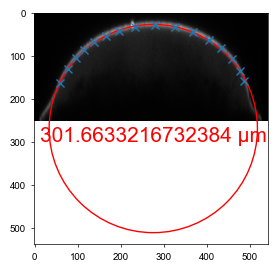

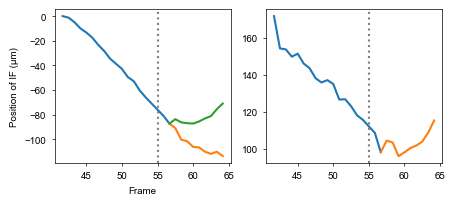

rep 2


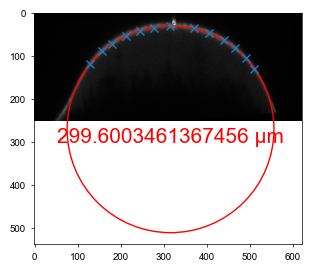

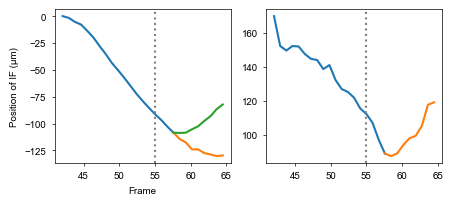

rep 3


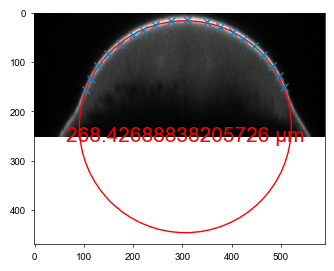

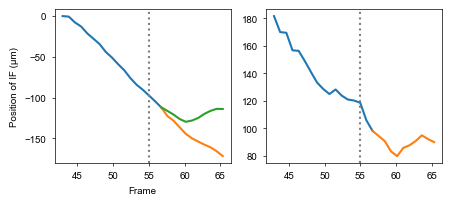

rep 4


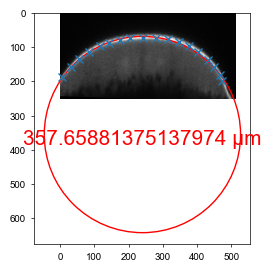

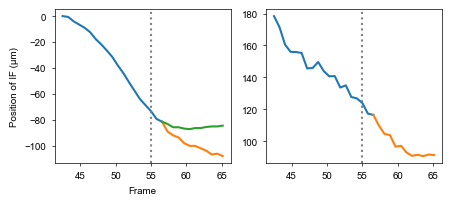

rep 5


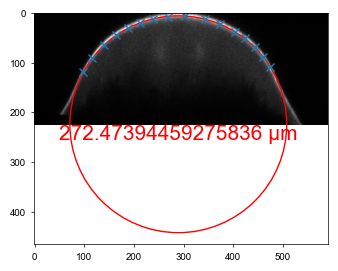

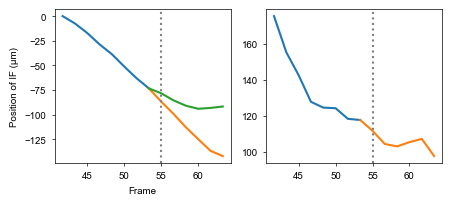

rep 6


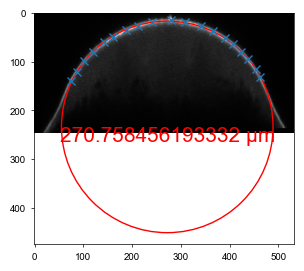

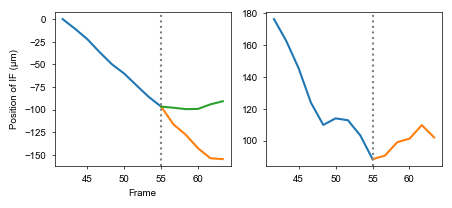

rep 7


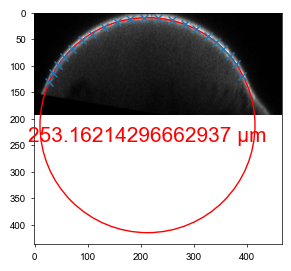

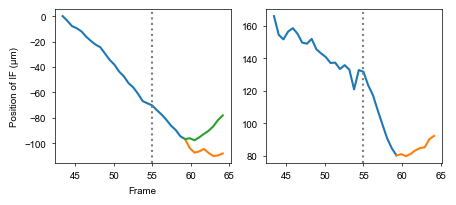

rep 8


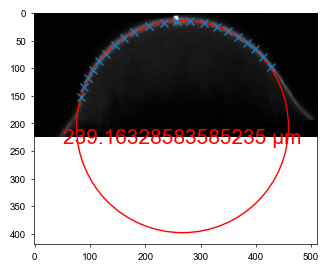

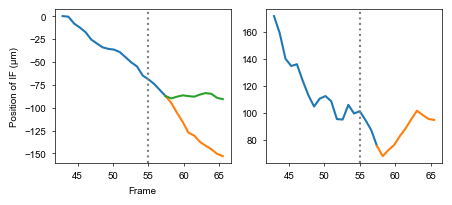

rep 9


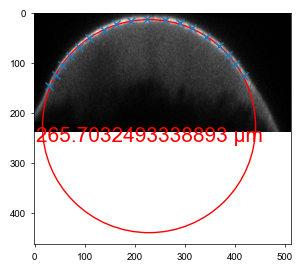

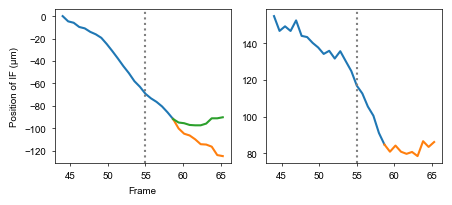

rep 11


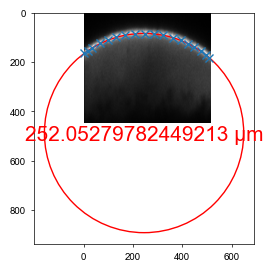

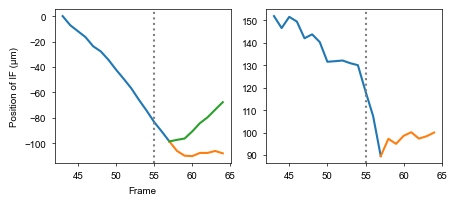

rep 12


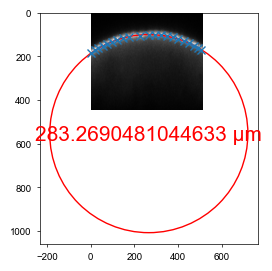

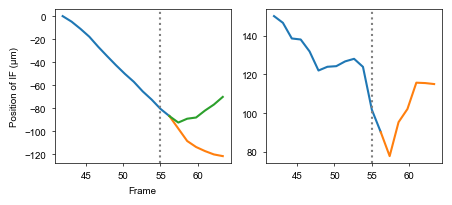

rep 26


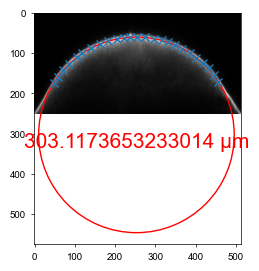

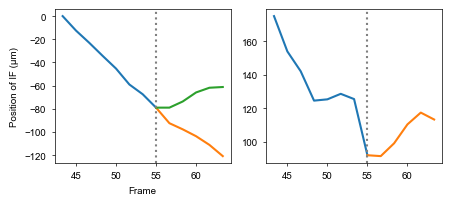

rep 27


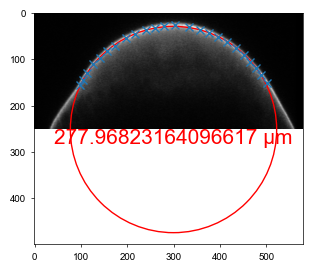

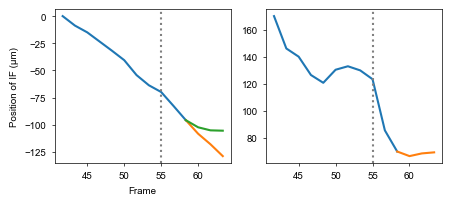

rep 36


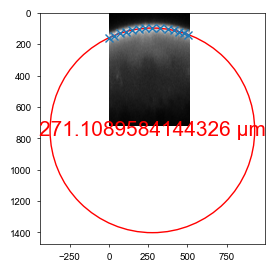

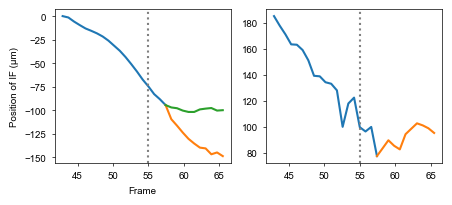

rep 37


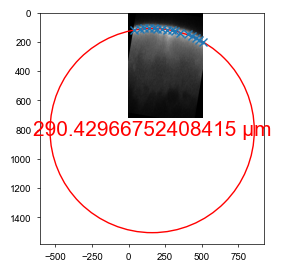

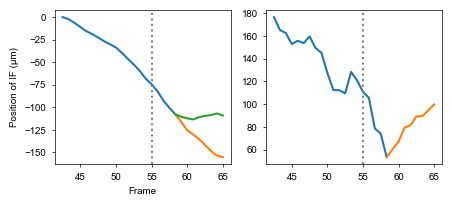

In [5]:
# wt processing

wt_info = []
wt_folder = "B:\\home\\Xin home drive\\data_meroblastic\\"

for i in wt_replicates_info.index:
# for i in range(8):

    replicate = wt_replicates_info.loc[i]
    print('rep', replicate.rep)

    # import the data (furrow indentation & invagination)
    replicate_file_name = wt_folder + '\\' + replicate.experiment + '\\' + replicate.embryo + '\\mt_cp.csv'
    replicate_mt_cp = pd.read_csv(replicate_file_name)
    if 'Slice' in replicate_mt_cp.columns:
        replicate_mt_cp = replicate_mt_cp.rename({'Slice':'Frame'}, axis='columns')
    replicate_mt_cp = replicate_mt_cp[['X', 'Y', 'Frame']].sort_values(['Frame', 'Y']).reset_index().drop(columns='index')

    # impor the data (furrow angle)
    replicate_file_name_angle = wt_folder + '\\' + replicate.experiment + '\\' + replicate.embryo + '\\sectionmidy_angle_measurement.csv'
    replicate_angle = pd.read_csv(replicate_file_name_angle)['0']

    # basic info
    pixel_size, time_interval = replicate.pixel_size, replicate.time_interval
    m1, m2 = int(replicate.m1), int(replicate.m2)
    septum1, ck1 = int(replicate.septum1), int(replicate.ck1)
    i3 = int(replicate.i3)

    # radius_0
    replicate_file_name_r0_fit_circle = wt_folder + '\\' + replicate.experiment + '\\' + replicate.embryo + '\\r0_fit_circle.csv'
    replicate_r0_fit_circle = pd.read_csv(replicate_file_name_r0_fit_circle)[['X', 'Y']]
    circle_points = np.array(replicate_r0_fit_circle) / pixel_size
    fit_circle_xc, fit_circle_yc, fit_circle_r = fit_circle(circle_points)

    movie_sectionmidy = wt_folder + '\\' + replicate.experiment + '\\' + replicate.embryo + '\\sectionmidy.tif'
    movie_sectionmidy = skimage.io.imread(movie_sectionmidy)
    if len(movie_sectionmidy.shape) == 4:
        movie_frame_r0_fit_circle = movie_sectionmidy[ck1-2, 1]
    elif len(movie_sectionmidy.shape) == 3:
        movie_frame_r0_fit_circle = movie_sectionmidy[ck1-2]

    fig,ax=plt.subplots(figsize=[4,3])
    ax.imshow(movie_frame_r0_fit_circle, cmap='Greys_r')
    ax.plot(circle_points[:,0], circle_points[:, 1], 'x')
    circle = mpl.patches.Circle(xy=(fit_circle_xc, fit_circle_yc), radius=fit_circle_r, fill=False, ec='red')
    ax.add_patch(circle)
    ax.text(fit_circle_xc, fit_circle_yc+30, str(fit_circle_r*pixel_size) + ' \u03BCm', color = 'red' , ha = 'center', fontsize=15)
    plt.show()
    r_0 = fit_circle_r*pixel_size


    # data itself
    if_position_phase1 = replicate_mt_cp[replicate_mt_cp.Frame<septum1].Y.values
    if_position_phase2 = replicate_mt_cp[replicate_mt_cp.Frame>=septum1].Y.values[1::2]
    cp_position_phase2 = replicate_mt_cp[replicate_mt_cp.Frame>=septum1].Y.values[0::2]

    angle_phase1 = np.array(replicate_angle[:septum1 - ck1])
    angle_phase2 = np.array(replicate_angle[septum1 - ck1-1:])

    frame_phase1 = replicate_mt_cp[replicate_mt_cp.Frame<septum1].Frame.values
    frame_phase2 = np.unique(replicate_mt_cp[replicate_mt_cp.Frame>=septum1].Frame.values)
    frame_phase12 = np.arange(ck1, i3+1)
    
    # connect them
    if_position_phase2 = np.insert(if_position_phase2, 0, if_position_phase1[-1])
    cp_position_phase2 = np.insert(cp_position_phase2, 0, if_position_phase1[-1])
    frame_phase2 = np.insert(frame_phase2, 0, frame_phase1[-1])

    # time
    time_phase1 = (frame_phase1 - m2)/(m1-m2)*(30-55) + 55
    time_phase2 = (frame_phase2 - m2)/(m1-m2)*(30-55) + 55
    time_phase12 = np.concatenate([time_phase1, time_phase2[1:]])

    # displacement
    if_displacement_phase1 = if_position_phase1[-1] - if_position_phase1[0]
    if_displacement_phase2 = if_position_phase2[-1] - if_position_phase2[0]

    # speed
    if_speed_phase1 = (if_position_phase1[-1] - if_position_phase1[0]) / (time_phase1[-1] - time_phase1[0])
    if_speed_phase2 = (if_position_phase2[-1] - if_position_phase2[0]) / (time_phase2[-1] - time_phase2[0])
    
    #save the data
    if_position_phase1_normalized = 0-(if_position_phase1 - if_position_phase1[0])
    if_position_phase2_normalized = 0-(if_position_phase2 - if_position_phase1[0])
    cp_position_phase2_normalized = 0-(cp_position_phase2 - if_position_phase1[0])

    replicate_info = {'name': 'Replicate ' + str(replicate.rep),
                      'data': [if_position_phase1_normalized, if_position_phase2_normalized, cp_position_phase2_normalized,
                               time_phase1, time_phase2, #3,4
                               if_displacement_phase1, if_displacement_phase2, #5,6
                               if_speed_phase1, if_speed_phase2, #7,8
                               angle_phase1, angle_phase2, #9,10
                               fit_circle_r*pixel_size]} #11
    
    wt_info.append(replicate_info)

    fig, [ax, ax1] = plt.subplots(1,2,figsize=[5,2])
    ax.plot(time_phase1, if_position_phase1_normalized)
    ax.plot(time_phase2, if_position_phase2_normalized)
    ax.plot(time_phase2, cp_position_phase2_normalized)
    ax.axvline(x = 55, color='grey', linestyle='dotted')
    # ax.invert_yaxis()
    ax.set_xlabel('Frame')
    ax.set_ylabel('Position of IF (\u03BCm)')

    ax1.plot(time_phase1, angle_phase1, color='tab:blue')
    ax1.plot(time_phase2, angle_phase2, color='tab:orange')
    ax1.axvline(x = 55, color='grey', linestyle='dotted')
    plt.show()

,ck,septum1,i3
count,15.000000,15.000000,15.000000
mean,42.539762,56.900897,64.348358
std,0.743964,1.570662,0.882696
min,41.666667,53.333333,63.333333
25%,41.785714,56.376488,63.333333
50%,42.500000,57.000000,64.166667
75%,42.965517,57.959770,65.225184
max,43.970588,59.268293,65.483871


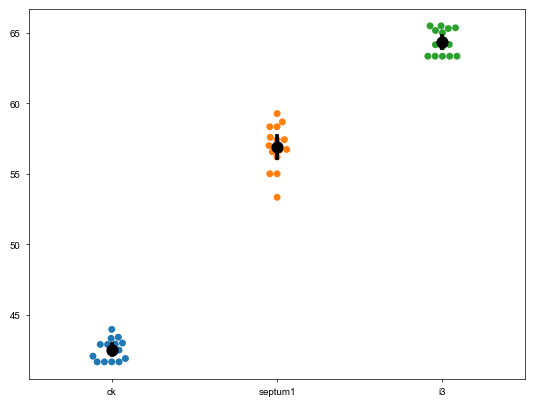

In [6]:
real_ck = [wt_info[i]['data'][3][0] for i in wt_replicates_info.index]
real_septum1 = [wt_info[i]['data'][4][0] for i in wt_replicates_info.index]
real_i3 = [wt_info[i]['data'][4][-1] for i in wt_replicates_info.index]

df = {'ck':real_ck, 'septum1':real_septum1, 'i3':real_i3}
df = pd.DataFrame(df)

sns.swarmplot(data = df)
sns.pointplot(data = df, color='black', ls='none', zorder=5)

df.describe()

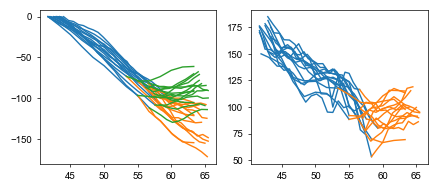

In [7]:
fig, [ax, ax1] = plt.subplots(1,2,figsize=[5,2])

# plot each individual replicate
for i in wt_replicates_info.index:

    if_displacement_phase1, if_displacement_phase2, cp_displacement_phase2, time_phase1, time_phase2 = wt_info[i]['data'][:5]
    angle_phase1, angle_phase2 = wt_info[i]['data'][9:11]
        
    lw, alpha = 1,  1
    ax.plot(time_phase1, if_displacement_phase1, color='tab:blue', lw=lw, zorder=-2, alpha=alpha)
    ax.plot(time_phase2, if_displacement_phase2, color='tab:orange', lw=lw, zorder=-1, alpha=alpha)
    ax.plot(time_phase2, cp_displacement_phase2, color='tab:green', lw=lw, zorder=0, alpha=alpha)

    ax1.plot(time_phase1, angle_phase1, color='tab:blue', lw=lw, zorder=-2, alpha=alpha)
    ax1.plot(time_phase2, angle_phase2, color='tab:orange', lw=lw, zorder=-1, alpha=alpha)
    
# ax.invert_yaxis()
plt.show()

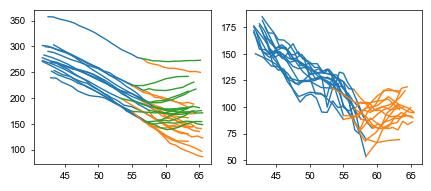

In [8]:
fig, [ax, ax1] = plt.subplots(1,2,figsize=[5,2])

# plot each individual replicate
for i in wt_replicates_info.index:

    if_displacement_phase1, if_displacement_phase2, cp_displacement_phase2, time_phase1, time_phase2 = wt_info[i]['data'][:5]
    angle_phase1, angle_phase2 = wt_info[i]['data'][9:11]
    r_0 = wt_info[i]['data'][11]
        
    lw, alpha = 1,  1
    ax.plot(time_phase1, r_0+if_displacement_phase1, color='tab:blue', lw=lw, zorder=-2, alpha=alpha)
    ax.plot(time_phase2, r_0+if_displacement_phase2, color='tab:orange', lw=lw, zorder=-1, alpha=alpha)
    ax.plot(time_phase2, r_0+cp_displacement_phase2, color='tab:green', lw=lw, zorder=0, alpha=alpha)

    ax1.plot(time_phase1, angle_phase1, color='tab:blue', lw=lw, zorder=-2, alpha=alpha)
    ax1.plot(time_phase2, angle_phase2, color='tab:orange', lw=lw, zorder=-1, alpha=alpha)
    
plt.show()

rep 1
rep 2
rep 3
rep 4
rep 5
rep 6
rep 7
rep 8
rep 9
rep 11
rep 12
rep 26
rep 27
rep 36
rep 37


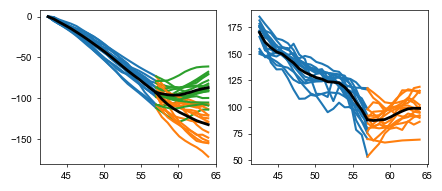

In [9]:
# average the wt displacements

time_phase1_interp = np.linspace(42.5, 57, 20)
time_phase2_interp = np.linspace(57, 64, 10)

if_displacement_phase1_interp = []
if_displacement_phase2_interp = []
cp_displacement_phase2_interp = []
angle_phase1_interp = []
angle_phase2_interp = []

fig, [ax, ax1] = plt.subplots(1,2,figsize=[5,2])

for i in wt_replicates_info.index:
# for i in[0]:
    print('rep', wt_replicates_info.rep[i])

    # if interp
    if_displacement_phase1 = wt_info[i]['data'][0]
    if_displacement_phase1_newtime = np.linspace(42.5, 57, len(if_displacement_phase1))
    # spl = CubicSpline(if_displacement_phase1_newtime, if_displacement_phase1)
    # if_displacement_phase1_new = spl(time_phase1_interp)
    if_displacement_phase1_new = np.interp(x=time_phase1_interp, xp=if_displacement_phase1_newtime, fp=if_displacement_phase1)
    if_displacement_phase1_interp.append(if_displacement_phase1_new)

    if_displacement_phase2 = wt_info[i]['data'][1]
    if_displacement_phase2_newtime = np.linspace(57, 64, len(if_displacement_phase2))
    # spl = CubicSpline(if_displacement_phase2_newtime, if_displacement_phase2)
    # if_displacement_phase2_new = spl(time_phase2_interp)
    if_displacement_phase2_new = np.interp(x=time_phase2_interp, xp=if_displacement_phase2_newtime, fp=if_displacement_phase2)
    if_displacement_phase2_interp.append(if_displacement_phase2_new)
    
    cp_displacement_phase2 = wt_info[i]['data'][2]
    # spl = CubicSpline(if_displacement_phase2_newtime, cp_displacement_phase2)
    # cp_displacement_phase2_new = spl(time_phase2_interp)
    cp_displacement_phase2_new = np.interp(x=time_phase2_interp, xp=if_displacement_phase2_newtime, fp=cp_displacement_phase2)
    cp_displacement_phase2_interp.append(cp_displacement_phase2_new)

    # angle interp
    angle_phase1 = wt_info[i]['data'][9]
    angle_phase1_newtime = np.linspace(42.5, 57, len(angle_phase1))
    # spl = CubicSpline(angle_phase1_newtime, angle_phase1)
    # angle_phase1_new = spl(time_phase1_interp)
    angle_phase1_new = np.interp(x=time_phase1_interp, xp=angle_phase1_newtime, fp=angle_phase1)
    angle_phase1_interp.append(angle_phase1_new)

    angle_phase2 = wt_info[i]['data'][10]
    angle_phase2_newtime = np.linspace(57, 64, len(angle_phase2))
    # spl = CubicSpline(angle_phase2_newtime, angle_phase2)
    # angle_phase2_new = spl(time_phase2_interp)
    angle_phase2_new = np.interp(x=time_phase2_interp, xp=angle_phase2_newtime, fp=angle_phase2)
    angle_phase2_interp.append(angle_phase2_new)

    ax.plot(time_phase1_interp, if_displacement_phase1_new, color='tab:blue')
    ax.plot(time_phase2_interp, if_displacement_phase2_new, color='tab:orange')
    ax.plot(time_phase2_interp, cp_displacement_phase2_new, color='tab:green')

    ax1.plot(time_phase1_interp, angle_phase1_new, color='tab:blue')
    ax1.plot(time_phase2_interp, angle_phase2_new, color='tab:orange')

# ax.invert_yaxis()


if_displacement_phase1_interp = np.array(if_displacement_phase1_interp)
if_displacement_phase2_interp = np.array(if_displacement_phase2_interp)
cp_displacement_phase2_interp = np.array(cp_displacement_phase2_interp)

angle_phase1_interp = np.array(angle_phase1_interp)
angle_phase2_interp = np.array(angle_phase2_interp)

if_cp_averaged_wo_r0 = []
for list in [if_displacement_phase1_interp, if_displacement_phase2_interp, cp_displacement_phase2_interp, angle_phase1_interp, angle_phase2_interp]:
    if_cp_averaged_wo_r0.append(np.average(list, axis=0))
    if_cp_averaged_wo_r0.append(np.std(list, axis=0))

ax.plot(time_phase1_interp, if_cp_averaged_wo_r0[0], color='black', lw=2)
ax.plot(time_phase2_interp, if_cp_averaged_wo_r0[2], color='black', lw=2)
ax.plot(time_phase2_interp, if_cp_averaged_wo_r0[4], color='black', lw=2)

ax1.plot(time_phase1_interp, if_cp_averaged_wo_r0[6], color='black', lw=2)
ax1.plot(time_phase2_interp, if_cp_averaged_wo_r0[8], color='black', lw=2)

plt.show()

rep 1
rep 2
rep 3
rep 4
rep 5
rep 6
rep 7
rep 8
rep 9
rep 11
rep 12
rep 26
rep 27
rep 36
rep 37


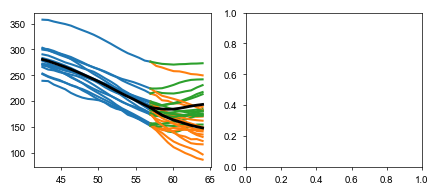

In [10]:
# average the wt displacements with r_0

time_phase1_interp = np.linspace(42.5, 57, 20)
time_phase2_interp = np.linspace(57, 64, 10)

if_displacement_phase1_interp_wr0 = []
if_displacement_phase2_interp_wr0 = []
cp_displacement_phase2_interp_wr0 = []

fig, [ax, ax1] = plt.subplots(1,2,figsize=[5,2])

for i in wt_replicates_info.index:
# for i in[0]:
    print('rep', wt_replicates_info.rep[i])
    r_0 = wt_info[i]['data'][11]

    # if interp
    if_displacement_phase1 = wt_info[i]['data'][0] + r_0
    if_displacement_phase1_newtime = np.linspace(42.5, 57, len(if_displacement_phase1))
    # spl = CubicSpline(if_displacement_phase1_newtime, if_displacement_phase1)
    # if_displacement_phase1_new = spl(time_phase1_interp)
    if_displacement_phase1_new = np.interp(x=time_phase1_interp, xp=if_displacement_phase1_newtime, fp=if_displacement_phase1)
    if_displacement_phase1_interp_wr0.append(if_displacement_phase1_new)

    if_displacement_phase2 = wt_info[i]['data'][1] + r_0
    if_displacement_phase2_newtime = np.linspace(57, 64, len(if_displacement_phase2))
    # spl = CubicSpline(if_displacement_phase2_newtime, if_displacement_phase2)
    # if_displacement_phase2_new = spl(time_phase2_interp)
    if_displacement_phase2_new = np.interp(x=time_phase2_interp, xp=if_displacement_phase2_newtime, fp=if_displacement_phase2)
    if_displacement_phase2_interp_wr0.append(if_displacement_phase2_new)
    
    cp_displacement_phase2 = wt_info[i]['data'][2] + r_0
    # spl = CubicSpline(if_displacement_phase2_newtime, cp_displacement_phase2)
    # cp_displacement_phase2_new = spl(time_phase2_interp)
    cp_displacement_phase2_new = np.interp(x=time_phase2_interp, xp=if_displacement_phase2_newtime, fp=cp_displacement_phase2)
    cp_displacement_phase2_interp_wr0.append(cp_displacement_phase2_new)


    ax.plot(time_phase1_interp, if_displacement_phase1_new, color='tab:blue')
    ax.plot(time_phase2_interp, if_displacement_phase2_new, color='tab:orange')
    ax.plot(time_phase2_interp, cp_displacement_phase2_new, color='tab:green')


if_displacement_phase1_interp_wr0 = np.array(if_displacement_phase1_interp_wr0)
if_displacement_phase2_interp_wr0 = np.array(if_displacement_phase2_interp_wr0)
cp_displacement_phase2_interp_wr0 = np.array(cp_displacement_phase2_interp_wr0)


if_cp_averaged_w_r0 = []
for list in [if_displacement_phase1_interp_wr0, if_displacement_phase2_interp_wr0, cp_displacement_phase2_interp_wr0]:
    if_cp_averaged_w_r0.append(np.average(list, axis=0))
    if_cp_averaged_w_r0.append(np.std(list, axis=0))

ax.plot(time_phase1_interp, if_cp_averaged_w_r0[0], color='black', lw=2)
ax.plot(time_phase2_interp, if_cp_averaged_w_r0[2], color='black', lw=2)
ax.plot(time_phase2_interp, if_cp_averaged_w_r0[4], color='black', lw=2)


plt.show()

rep 1
rep 2
rep 3
rep 4
rep 5
rep 6
rep 7
rep 8
rep 9
rep 11
rep 12
rep 26
rep 27
rep 36
rep 37


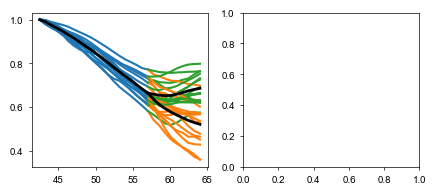

In [11]:
# average the wt displacements with r_0

time_phase1_interp = np.linspace(42.5, 57, 20)
time_phase2_interp = np.linspace(57, 64, 10)

if_displacement_phase1_interp_wr0_2 = []
if_displacement_phase2_interp_wr0_2 = []
cp_displacement_phase2_interp_wr0_2 = []

fig, [ax, ax1] = plt.subplots(1,2,figsize=[5,2])

for i in wt_replicates_info.index:
# for i in[0]:
    print('rep', wt_replicates_info.rep[i])
    r_0 = wt_info[i]['data'][11]

    # if interp
    if_displacement_phase1 = wt_info[i]['data'][0] / r_0 +1
    if_displacement_phase1_newtime = np.linspace(42.5, 57, len(if_displacement_phase1))
    # spl = CubicSpline(if_displacement_phase1_newtime, if_displacement_phase1)
    # if_displacement_phase1_new = spl(time_phase1_interp)
    if_displacement_phase1_new = np.interp(x=time_phase1_interp, xp=if_displacement_phase1_newtime, fp=if_displacement_phase1)
    if_displacement_phase1_interp_wr0_2.append(if_displacement_phase1_new)

    if_displacement_phase2 = wt_info[i]['data'][1] / r_0 +1
    if_displacement_phase2_newtime = np.linspace(57, 64, len(if_displacement_phase2))
    # spl = CubicSpline(if_displacement_phase2_newtime, if_displacement_phase2)
    # if_displacement_phase2_new = spl(time_phase2_interp)
    if_displacement_phase2_new = np.interp(x=time_phase2_interp, xp=if_displacement_phase2_newtime, fp=if_displacement_phase2)
    if_displacement_phase2_interp_wr0_2.append(if_displacement_phase2_new)
    
    cp_displacement_phase2 = wt_info[i]['data'][2] / r_0 +1
    # spl = CubicSpline(if_displacement_phase2_newtime, cp_displacement_phase2)
    # cp_displacement_phase2_new = spl(time_phase2_interp)
    cp_displacement_phase2_new = np.interp(x=time_phase2_interp, xp=if_displacement_phase2_newtime, fp=cp_displacement_phase2)
    cp_displacement_phase2_interp_wr0_2.append(cp_displacement_phase2_new)


    ax.plot(time_phase1_interp, if_displacement_phase1_new, color='tab:blue')
    ax.plot(time_phase2_interp, if_displacement_phase2_new, color='tab:orange')
    ax.plot(time_phase2_interp, cp_displacement_phase2_new, color='tab:green')


if_displacement_phase1_interp_wr0_2 = np.array(if_displacement_phase1_interp_wr0_2)
if_displacement_phase2_interp_wr0_2 = np.array(if_displacement_phase2_interp_wr0_2)
cp_displacement_phase2_interp_wr0_2 = np.array(cp_displacement_phase2_interp_wr0_2)


if_cp_averaged_w_r0_2 = []
for list in [if_displacement_phase1_interp_wr0_2, if_displacement_phase2_interp_wr0_2, cp_displacement_phase2_interp_wr0_2]:
    if_cp_averaged_w_r0_2.append(np.average(list, axis=0))
    if_cp_averaged_w_r0_2.append(np.std(list, axis=0))

ax.plot(time_phase1_interp, if_cp_averaged_w_r0_2[0], color='black', lw=2)
ax.plot(time_phase2_interp, if_cp_averaged_w_r0_2[2], color='black', lw=2)
ax.plot(time_phase2_interp, if_cp_averaged_w_r0_2[4], color='black', lw=2)


plt.show()

rep 1
rep 2
rep 3
rep 4
rep 5
rep 6
rep 7
rep 8
rep 9
rep 11
rep 12
rep 26
rep 27
rep 36
rep 37


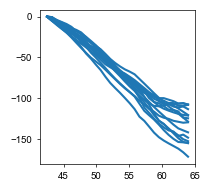

In [12]:
# another way to average

# time_phase1_interp = np.linspace(42.5, 57.5, 20)
# time_phase2_interp = np.linspace(57.5, 64, 10)
time_phase12_interp = np.linspace(42.5, 64, 30)

if_displacement_phase12_interp = []
# if_displacement_phase2_interp = []
# cp_displacement_phase2_interp = []

fig, ax =plt.subplots(figsize=[2,2])

for i in wt_replicates_info.index:
# for i in[0]:
    print('rep', wt_replicates_info.rep[i])

    # if_displacement_phase1
    if_displacement_phase1 = wt_info[i]['data'][0]
    if_displacement_phase2 = wt_info[i]['data'][1]

    if_displacement_phase12 = np.concatenate([if_displacement_phase1[:-1], if_displacement_phase2])
    # spl = CubicSpline(np.linspace(42.5,64,len(if_displacement_phase12)), if_displacement_phase12)
    # if_displacement_phase12_new = spl(time_phase12_interp)
    if_displacement_phase12_new = np.interp(x=time_phase12_interp, xp=np.linspace(42.5,64,len(if_displacement_phase12)), fp=if_displacement_phase12)
    if_displacement_phase12_interp.append(if_displacement_phase12_new)

    ax.plot(time_phase12_interp, if_displacement_phase12_new, color='tab:blue')
    
# ax.invert_yaxis()
plt.show()

# if_displacement_phase1_interp = np.array(if_displacement_phase1_interp)
# if_displacement_phase2_interp = np.array(if_displacement_phase2_interp)
# cp_displacement_phase2_interp = np.array(cp_displacement_phase2_interp)

if_cp_averaged_2 = []
for list in [if_displacement_phase12_interp]:
    if_cp_averaged_2.append(np.average(list, axis=0))
    if_cp_averaged_2.append(np.std(list, axis=0))
# if_cp_averaged_2

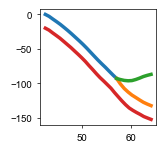

In [13]:
fig, ax = plt.subplots(figsize=[1.5, 1.5])
lw=2.5
ax.plot(time_phase1_interp, if_cp_averaged_wo_r0[0], color='tab:blue', lw=lw, zorder=1, label='phase 1 - furrow depth')
ax.plot(time_phase2_interp, if_cp_averaged_wo_r0[2], color='tab:orange', lw=lw, zorder=1, label='phase 2 - membrane tip')
ax.plot(time_phase2_interp, if_cp_averaged_wo_r0[4], color='tab:green', lw=lw, zorder=1, label='phase 2 - contact point')
ax.plot(time_phase12_interp, if_cp_averaged_2[0]-20, color='tab:red', lw=lw, zorder=1, label='phase 2 - contact point')
# ax.invert_yaxis()
plt.show()

In [14]:
speed_phase1_interp = (if_cp_averaged_wo_r0[0][-1] - if_cp_averaged_wo_r0[0][0]) / (time_phase1_interp[-1] - time_phase1_interp[0])
speed_phase2_interp = (if_cp_averaged_wo_r0[2][-1] - if_cp_averaged_wo_r0[2][0]) / (time_phase2_interp[-1] - time_phase2_interp[0])
print(speed_phase1_interp, speed_phase2_interp)

-6.424275862068965 -5.630819047619052


280.4371011798415
272.47394459275836


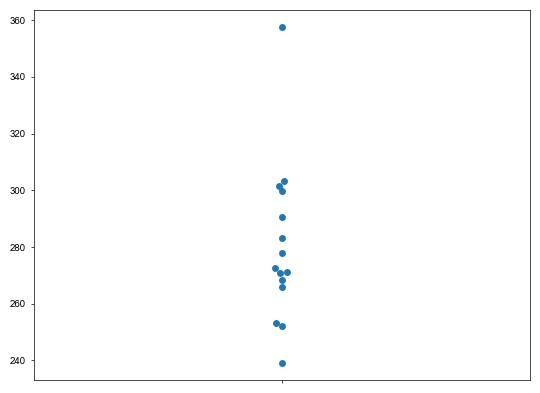

In [15]:
r_0_s = np.array([wt_info[i]['data'][11] for i in wt_replicates_info.index])
sns.swarmplot(r_0_s)

print(np.mean(r_0_s))
print(np.median(r_0_s))

r_0_mean = np.median(r_0_s)

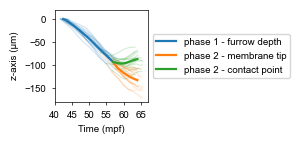

In [16]:
fig, ax = plt.subplots(figsize=[1.2, 1.2])

# plot each individual replicate
for i in wt_replicates_info.index:
    # print('rep', replicates_info.rep[i])

    if_displacement_phase1, if_displacement_phase2, cp_displacement_phase2, time_phase1, time_phase2 = wt_info[i]['data'][:5]
    # print(time_phase1[0], time_phase2[-1])
    
    lw, alpha = 0.8,  0.2
    ax.plot(time_phase1, if_displacement_phase1, color='tab:blue', lw=lw, zorder=-2, alpha=alpha)
    ax.plot(time_phase2, if_displacement_phase2, color='tab:orange', lw=lw, zorder=-1, alpha=alpha)
    ax.plot(time_phase2, cp_displacement_phase2, color='tab:green', lw=lw, zorder=0, alpha=alpha)

# plot the averaged
lw=1.6
ax.plot(time_phase1_interp, if_cp_averaged_wo_r0[0], color='tab:blue', lw=lw, zorder=1, label='phase 1 - furrow depth')
ax.plot(time_phase2_interp, if_cp_averaged_wo_r0[2], color='tab:orange', lw=lw, zorder=1, label='phase 2 - membrane tip')
ax.plot(time_phase2_interp, if_cp_averaged_wo_r0[4], color='tab:green', lw=lw, zorder=2, label='phase 2 - contact point')
# ax.vlines(x=time_phase2_interp, ymin=if_cp_averaged[2], ymax=if_cp_averaged[4], color='tab:orange', lw=lw*0.3, zorder=1, label='phase 2 - contact point')

# ax.axvline(x = 55, color='r', linestyle='dotted')

# ax.invert_yaxis()
ax.set_ylim(-180, 20)
# ax.set_yticks(np.arange(0, 201, 50)) 
ax.set_xlim(40, 67)
ax.set_xticks(np.arange(40, 70, 5)) 
ax.set_xlabel('Time (mpf)', fontsize=7)
ax.set_ylabel('z-axis (\u03BCm)', fontsize=7)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, fontsize=7)
# ax.set_aspect(1/7.5)

plt.savefig('furrow_tip_displacement2.svg')
plt.show()

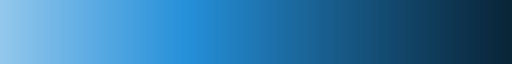

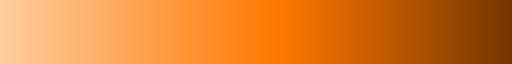

In [17]:
def shaded_cmap(color="tab:blue", shade_range=[.2, .8]):
    import colorsys
    num = 1024
    color_rgb = mpl.colors.to_rgb(color)
    color_hls = colorsys.rgb_to_hls(color_rgb[0], color_rgb[1], color_rgb[2])
    shading = np.linspace(shade_range[0], shade_range[1], num)
    gamma = math.log(0.5) / math.log(color_hls[1])
    shading_conversion = np.exp(np.log(shading)/gamma)
    shaded_cmap = []
    for i in range(num):
        shaded_color = colorsys.hls_to_rgb(color_hls[0], shading_conversion[i], color_hls[2])
        shaded_cmap.append(shaded_color)
    
    # _,ax=plt.subplots(figsize=(3,2))
    # ax.scatter(range(num), shading_conversion, color=shaded_cmap)
    # ax.scatter((num-1)/2, color_hls[1], color=color, s=200)
    # ax.set_ylim(0,1)
    # ax.set_ylabel('Lightness')
    # plt.show()

    shaded_cmap = mpl.colors.ListedColormap(shaded_cmap)
    return shaded_cmap


def colored_line(x,y,c,ax, vmin='auto', vmax='auto', **lc_kwargs):
    
    from matplotlib.collections import LineCollection
    default_kwargs = {"capstyle": "butt"}
    default_kwargs.update(lc_kwargs)

    # c = (c-np.nanmin(c)) / (np.nanmax(c) - np.nanmin(c))
    # c = (c-vmin) / (vmax-vmin)
    # colors = plt.colormaps[cmap](c)

    x = np.asarray(x)
    y = np.asarray(y)
    x_midpts = np.hstack((x[0], 0.5 * (x[1:] + x[:-1]), x[-1]))
    y_midpts = np.hstack((y[0], 0.5 * (y[1:] + y[:-1]), y[-1]))

    coord_start = np.column_stack((x_midpts[:-1], y_midpts[:-1]))[:, np.newaxis, :]
    coord_mid = np.column_stack((x, y))[:, np.newaxis, :]
    coord_end = np.column_stack((x_midpts[1:], y_midpts[1:]))[:, np.newaxis, :]
    segments = np.concatenate((coord_start, coord_mid, coord_end), axis=1)

    if vmin == 'auto':
        vmin = c.min()
    if vmax == 'auto':
        vmax = c.max()

    lc = LineCollection(segments, **default_kwargs)
    if (vmin==0) and (vmax ==1):
        lc.set_array(c)
    else:
        lc.set_array(c)
        lc.set(clim=(vmin, vmax))

    return ax.add_collection(lc)


shaded_tab_blue = shaded_cmap("tab:blue", [0.8, 0.2])
shaded_tab_orange = shaded_cmap("tab:orange", [0.8, 0.2])

display(shaded_tab_blue)
display(shaded_tab_orange)

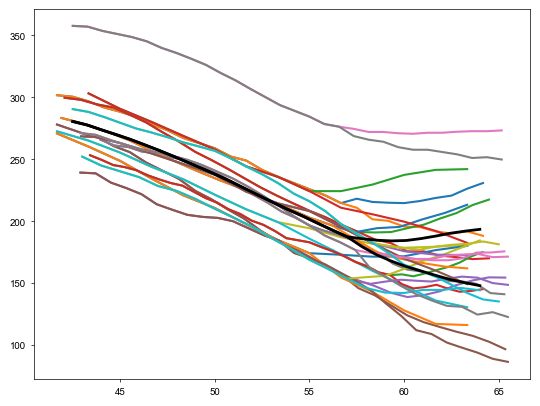

In [18]:
# export h1 h2

folder = 'furrow_position_wt_h1h2'
create_folder(folder)


for i in wt_replicates_info.index:
    if_displacement_phase1, if_displacement_phase2, cp_displacement_phase2, time_phase1, time_phase2 = wt_info[i]['data'][:5]
    r_0 = wt_info[i]['data'][11]

    time_phase12 = np.concatenate([time_phase1[:-1], time_phase2])
    h_1 = np.concatenate([if_displacement_phase1[:-1], cp_displacement_phase2]) + r_0
    h_2 = np.concatenate([if_displacement_phase1[:-1], if_displacement_phase2]) + r_0
    np.save(folder + "\\" + wt_info[i]['name'] + "_time_h1_h2.npy", [time_phase12, h_1, h_2])

    plt.plot(time_phase12, h_1)
    plt.plot(time_phase12, h_2)

time_phase12 = np.concatenate([time_phase1_interp[:-1], time_phase2_interp])
h_1 = np.concatenate([if_cp_averaged_w_r0[0][:-1], if_cp_averaged_w_r0[2]])
h_2 = np.concatenate([if_cp_averaged_w_r0[0][:-1], if_cp_averaged_w_r0[4]])
np.save(folder + "\\wt_avg_time_h1_h2.npy", [time_phase12, h_1, h_2])

plt.plot(time_phase12, h_1, color='black', lw=2)
plt.plot(time_phase12, h_2, color='black', lw=2)

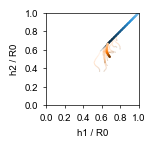

0.6642035154628515 0.6859223158596038 0.5212070027698842


In [19]:
fig, ax = plt.subplots(figsize=[1.2, 1.2])

for i in wt_replicates_info.index:
    # print('rep', replicates_info.rep[i])

    if_displacement_phase1, if_displacement_phase2, cp_displacement_phase2, time_phase1, time_phase2 = wt_info[i]['data'][:5]
    r_0 = wt_info[i]['data'][11]

    lw, alpha = 0.8,  0.2
# 
    colored_line(x=if_displacement_phase1/r_0+1, y=if_displacement_phase1/r_0+1, c=time_phase1, cmap=shaded_tab_blue, lw=lw, zorder=-2, alpha=alpha, ax=ax)#, capstyle='round')
    colored_line(x=cp_displacement_phase2/r_0+1, y=if_displacement_phase2/r_0+1, c=time_phase2, cmap=shaded_tab_orange, lw=lw, zorder=-1, alpha=alpha, ax=ax)#, capstyle='round')

# plot the averaged
lw=1.6

colored_line(x=if_cp_averaged_w_r0_2[0], y=if_cp_averaged_w_r0_2[0], c=time_phase1_interp, vmin=42.5, vmax=57, cmap=shaded_tab_blue, lw=lw, zorder=1, ax=ax, label='phase 1 - furrow depth', capstyle='round')
colored_line(x=if_cp_averaged_w_r0_2[4], y=if_cp_averaged_w_r0_2[2], c=time_phase2_interp, vmin=57, vmax=64, cmap=shaded_tab_orange, lw=lw, zorder=1, ax=ax, label='phase 2 - membrane tip', capstyle='round')

ax.set_ylim(0, 1)
ax.set_yticks(np.arange(0, 1.1, 0.2)) 
ax.set_xlim(0, 1)
ax.set_xticks(np.arange(0, 1.1, 0.2)) 

ax.set_xlabel('h1 / R0', fontsize=7)
ax.set_ylabel('h2 / R0', fontsize=7)
ax.set_aspect('equal')
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, fontsize=7)
plt.savefig('furrow_tip_displacement8.svg')
plt.show()

print(if_cp_averaged_w_r0_2[0][-1],
      if_cp_averaged_w_r0_2[4][-1],
      if_cp_averaged_w_r0_2[2][-1])

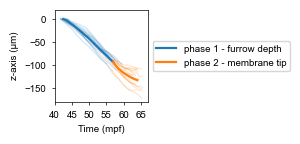

In [20]:
fig, ax = plt.subplots(figsize=[1.2, 1.2])

# plot each individual replicate
for i in wt_replicates_info.index:
    # print('rep', replicates_info.rep[i])

    if_displacement_phase1, if_displacement_phase2, cp_displacement_phase2, time_phase1, time_phase2 = wt_info[i]['data'][:5]
    # print(time_phase1[0], time_phase2[-1])
    
    lw, alpha = 0.8,  0.2
    ax.plot(time_phase1, if_displacement_phase1, color='tab:blue', lw=lw, zorder=-2, alpha=alpha)
    ax.plot(time_phase2, if_displacement_phase2, color='tab:orange', lw=lw, zorder=-1, alpha=alpha)
    # ax.plot(time_phase2, cp_displacement_phase2, color='tab:green', lw=lw, zorder=0, alpha=alpha)

# plot the averaged
lw=1.6
ax.plot(time_phase1_interp, if_cp_averaged_wo_r0[0], color='tab:blue', lw=lw, zorder=1, label='phase 1 - furrow depth')
ax.plot(time_phase2_interp, if_cp_averaged_wo_r0[2], color='tab:orange', lw=lw, zorder=1, label='phase 2 - membrane tip')
# ax.plot(time_phase2_interp, if_cp_averaged_wo_r0[4], color='tab:green', lw=lw, zorder=2, label='phase 2 - contact point')
# ax.vlines(x=time_phase2_interp, ymin=if_cp_averaged[2], ymax=if_cp_averaged[4], color='tab:orange', lw=lw*0.3, zorder=1, label='phase 2 - contact point')

# ax.axvline(x = 55, color='r', linestyle='dotted')

# ax.invert_yaxis()
ax.set_ylim(-180, 20)
# ax.set_yticks(np.arange(0, 201, 50)) 
ax.set_xlim(40, 67)
ax.set_xticks(np.arange(40, 70, 5)) 
ax.set_xlabel('Time (mpf)', fontsize=7)
ax.set_ylabel('z-axis (\u03BCm)', fontsize=7)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, fontsize=7)
# ax.set_aspect(1/7.5)

plt.savefig('furrow_tip_displacement10.svg')
plt.show()

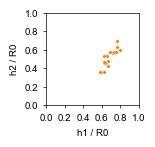

In [21]:
fig, ax = plt.subplots(figsize=[1.2, 1.2])
# ax.imshow(phase2_energy_landscape, extent=[0,1,0,1])

for i in wt_replicates_info.index:
    # print('rep', replicates_info.rep[i])

    if_displacement_phase1, if_displacement_phase2, cp_displacement_phase2, time_phase1, time_phase2 = wt_info[i]['data'][:5]
    r_0 = wt_info[i]['data'][11]

    lw, alpha = 0.8,  .75
    # ax.plot(if_displacement_phase1/r_0+1, if_displacement_phase1/r_0+1, color='tab:orange', lw=lw, alpha=alpha, zorder=4)
    # ax.plot(cp_displacement_phase2/r_0+1, if_displacement_phase2/r_0+1, color='tab:orange', lw=lw, alpha=alpha, zorder=4)

    ax.plot(cp_displacement_phase2[-1]/r_0+1, if_displacement_phase2[-1]/r_0+1, marker='o', mfc='tab:orange', mec='white', mew=0.25, markersize=2.5, alpha=1, zorder=5)
    # colored_line(x=if_displacement_phase1/r_0+1, y=if_displacement_phase1/r_0+1, c=time_phase1, cmap=shaded_tab_blue, lw=lw, zorder=-2, alpha=alpha, ax=ax)#, capstyle='round')
    # colored_line(x=cp_displacement_phase2/r_0+1, y=if_displacement_phase2/r_0+1, c=time_phase2, cmap=shaded_tab_orange, lw=lw, zorder=-1, alpha=alpha, ax=ax)#, capstyle='round')

# plot the averaged
lw=1.6
# ax.plot(if_cp_averaged_w_r0[0]/if_cp_averaged_w_r0[0][0], if_cp_averaged_w_r0[0]/if_cp_averaged_w_r0[0][0], lw=lw)
# ax.plot(if_cp_averaged_w_r0[4]/if_cp_averaged_w_r0[0][0], if_cp_averaged_w_r0[2]/if_cp_averaged_w_r0[0][0], lw=lw)

# colored_line(x=if_cp_averaged_w_r0[0]/if_cp_averaged_w_r0[0][0], y=if_cp_averaged_w_r0[0]/if_cp_averaged_w_r0[0][0], c=time_phase1_interp, vmin=42.5, vmax=57, cmap=shaded_tab_blue, lw=lw, zorder=1, ax=ax, label='phase 1 - furrow depth', capstyle='round')
# colored_line(x=if_cp_averaged_w_r0[4]/if_cp_averaged_w_r0[0][0], y=if_cp_averaged_w_r0[2]/if_cp_averaged_w_r0[0][0], c=time_phase2_interp, vmin=57, vmax=64, cmap=shaded_tab_orange, lw=lw, zorder=1, ax=ax, label='phase 2 - membrane tip', capstyle='round')

ax.set_ylim(0, 1)
ax.set_yticks(np.arange(0, 1.1, 0.2)) 
ax.set_xlim(0, 1)
ax.set_xticks(np.arange(0, 1.1, 0.2)) 

ax.set_xlabel('h1 / R0', fontsize=7)
ax.set_ylabel('h2 / R0', fontsize=7)
ax.set_aspect('equal')
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, fontsize=7)
plt.savefig('furrow_tip_displacement9.svg')
plt.show()

C:\Users\xtong\AppData\Local\Temp\ipykernel_16016\1200972020.py:15: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  plt.savefig('furrow_tip_displacement4_colorbar.svg')
c:\Users\xtong\AppData\Local\miniforge3\envs\xint\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


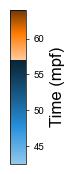

In [22]:
fig, ax = plt.subplots(figsize=(0.2, 2), layout='constrained')

phase1_color_num = int((57-42.5) / (64-42.5) * 1024)
phase2_color_num = 1024 - phase1_color_num
colors = np.vstack([shaded_tab_blue(np.linspace(0, 1, phase1_color_num)),
                    shaded_tab_orange(np.linspace(0, 1, phase2_color_num))])
custom_cmap = mpl.colors.ListedColormap(colors)

fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=42.5, vmax=64),
                                   cmap=custom_cmap),
                                   cax=ax, orientation='vertical')

ax.set_ylabel('Time (mpf)', fontsize=12)
ax.set_yticks(np.arange(45,61,5))
plt.savefig('furrow_tip_displacement4_colorbar.svg')

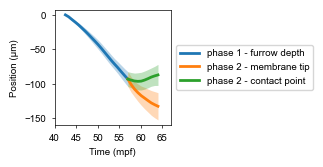

In [23]:
fig, ax = plt.subplots(figsize=[1.5, 1.5])

# plot the averaged
lw=2
ax.plot(time_phase1_interp, if_cp_averaged_wo_r0[0], color='tab:blue', lw=lw, zorder=1, label='phase 1 - furrow depth')
ax.plot(time_phase2_interp, if_cp_averaged_wo_r0[2], color='tab:orange', lw=lw, zorder=1, label='phase 2 - membrane tip')
ax.plot(time_phase2_interp, if_cp_averaged_wo_r0[4], color='tab:green', lw=lw, zorder=1, label='phase 2 - contact point')

ax.fill_between(time_phase1_interp, if_cp_averaged_wo_r0[0]-if_cp_averaged_wo_r0[1], if_cp_averaged_wo_r0[0]+if_cp_averaged_wo_r0[1], color='tab:blue', zorder=0, lw=0, alpha = 0.3)
ax.fill_between(time_phase2_interp, if_cp_averaged_wo_r0[2]-if_cp_averaged_wo_r0[3], if_cp_averaged_wo_r0[2]+if_cp_averaged_wo_r0[3], color='tab:orange', zorder=0, lw=0, alpha = 0.3)
ax.fill_between(time_phase2_interp, if_cp_averaged_wo_r0[4]-if_cp_averaged_wo_r0[5], if_cp_averaged_wo_r0[4]+if_cp_averaged_wo_r0[5], color='tab:green', zorder=0, lw=0, alpha = 0.3)

# ax.axvline(x = 55, color='r', linestyle='dotted')

# ax.invert_yaxis()
# ax.set_ylim(185, -10)
# ax.set_yticks(np.arange(0, 181, 30)) 
ax.set_xlim(40, 67)
ax.set_xticks(np.arange(40, 70, 5)) 
ax.set_xlabel('Time (mpf)', fontsize=7)
ax.set_ylabel('Position (\u03BCm)', fontsize=7)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, fontsize=7)
plt.savefig('furrow_tip_displacement3.svg')
plt.show()

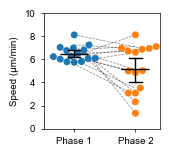

6.503449485225885
5.171160638383841
TtestResult(statistic=np.float64(2.4665066002162885), pvalue=np.float64(0.027166620616633493), df=np.int64(14))


In [24]:
wt_speeds = np.array([wt_info[i]['data'][7:9] for i in wt_replicates_info.index])

fig, ax = plt.subplots(figsize=[1.5, 1.5])
wt_speeds_plot = sns.swarmplot(wt_speeds, ax=ax, size=5)
swarmplot_pair_lines(wt_speeds_plot, ax)

sns.pointplot(data = wt_speeds, color='black', ax=ax,
              estimator='mean', errorbar=('ci', 95),
              linestyle='none', marker="_", markersize=20, markeredgewidth=1, zorder=10,
              capsize=0.2, err_kws={'linewidth': 1})

ax.set_xticks([0,1])
ax.set_xticklabels(['Phase 1', 'Phase 2'])
ax.set_xlim(-0.5, 1.4)
ax.set_ylim(0, 10)
ax.set_yticks(np.arange(0,11,2))
ax.set_ylabel('Speed (\u03BCm/min)')
plt.savefig('phase1_phase2_speed.svg')
plt.show()

# statistics
group1 = wt_speeds[:, 0]
group2 = wt_speeds[:, 1]
print(np.mean(group1))
print(np.mean(group2))
print(scipy.stats.ttest_rel(group1, group2))

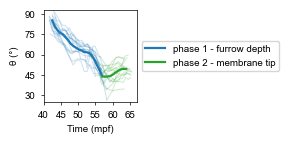

In [25]:
fig, ax = plt.subplots(figsize=[1.2, 1.2])

# plot each individual replicate
for i in wt_replicates_info.index:
    # print('rep', replicates_info.rep[i])

    if_displacement_phase1, if_displacement_phase2, cp_displacement_phase2, time_phase1, time_phase2 = wt_info[i]['data'][:5]
    angle_phase1, angle_phase2 = wt_info[i]['data'][9:11]
    # print(time_phase1[0], time_phase2[-1])
    
    lw, alpha = 0.8,  0.2
    # ax.plot(time_phase1, if_displacement_phase1, color='tab:blue', lw=lw, zorder=-2, alpha=alpha)
    # ax.plot(time_phase2, if_displacement_phase2, color='tab:orange', lw=lw, zorder=-1, alpha=alpha)
    # ax.plot(time_phase2, cp_displacement_phase2, color='tab:green', lw=lw, zorder=0, alpha=alpha)

    ax.plot(time_phase1, angle_phase1/2, color='tab:blue', lw=lw, zorder=-2, alpha=alpha)
    ax.plot(time_phase2, angle_phase2/2, color='tab:green', lw=lw, zorder=-1, alpha=alpha)

# plot the averaged
lw=1.6
# ax.plot(time_phase1_interp, if_cp_averaged[0], color='tab:blue', lw=lw, zorder=1, label='phase 1 - furrow depth')
# ax.plot(time_phase2_interp, if_cp_averaged[2], color='tab:orange', lw=lw, zorder=1, label='phase 2 - membrane tip')
# ax.plot(time_phase2_interp, if_cp_averaged[4], color='tab:green', lw=lw, zorder=2, label='phase 2 - contact point')
# ax.vlines(x=time_phase2_interp, ymin=if_cp_averaged[2], ymax=if_cp_averaged[4], color='tab:orange', lw=lw*0.3, zorder=1, label='phase 2 - contact point')

ax.plot(time_phase1_interp, if_cp_averaged_wo_r0[6]/2, color='tab:blue', lw=lw, zorder=1, label='phase 1 - furrow depth')
ax.plot(time_phase2_interp, if_cp_averaged_wo_r0[8]/2, color='tab:green', lw=lw, zorder=1, label='phase 2 - membrane tip')

# ax.axvline(x = 55, color='r', linestyle='dotted')

# ax.invert_yaxis()
ax.set_ylim(25, 93)
ax.set_yticks(np.arange(30, 91, 15)) 
ax.set_xlim(40, 67)
ax.set_xticks(np.arange(40, 70, 5)) 
ax.set_xlabel('Time (mpf)', fontsize=7)
ax.set_ylabel('θ (°)', fontsize=7)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, fontsize=7)
plt.savefig('furrow_angle_wt.svg')
plt.show()

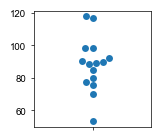

In [26]:
wt_finalangle_phase1 = np.array([wt_info[i]['data'][9][-1] for i in wt_replicates_info.index])

fig, ax = plt.subplots(figsize=[1.5, 1.5])

sns.swarmplot(wt_finalangle_phase1, ax=ax)
plt.show()

    

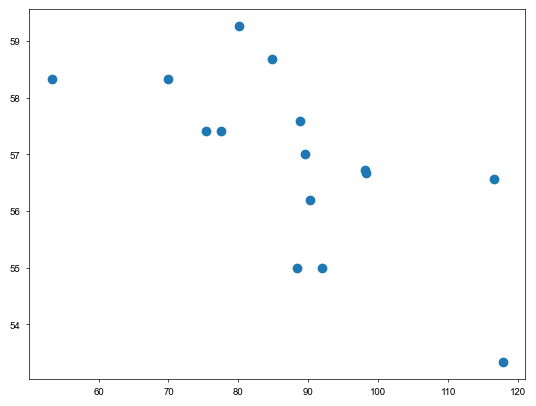

Text(0.5, 0, 'angle')

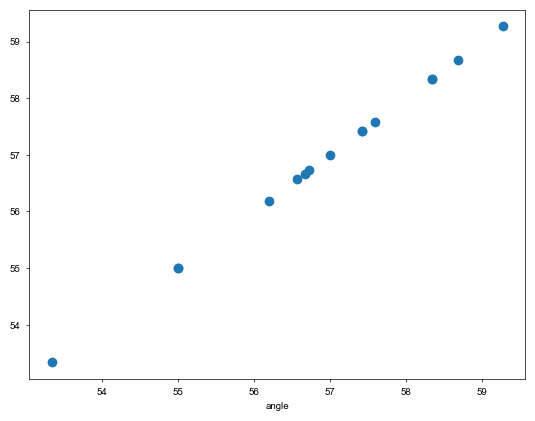

In [27]:
wt_displacement_phase1 = np.array([wt_info[i]['data'][5] for i in wt_replicates_info.index])
wt_phase2_onset = np.array([wt_info[i]['data'][4][0] for i in wt_replicates_info.index])
wt_phase1_final_angle = np.array([wt_info[i]['data'][9][-1] for i in wt_replicates_info.index])

plt.scatter(wt_phase1_final_angle, wt_phase2_onset)
plt.show()
plt.scatter(wt_phase2_onset, wt_phase2_onset)

plt.gca().set_xlabel('angle')
# plt.show()

# plt.plot([55]wt_phase2_onset)
# plt.scatter(wt_phase1_final_angle, wt_phase2_onset)

In [28]:
data_info = pd.read_excel('B:\\home\\Xin home drive\\data_meroblastic\\majority_data_info.xlsx')
cafree_replicates_info = data_info[data_info['furrow_indentation']=='cafree'].reset_index()
cafree_replicates_info

,index,rep,experiment,Unnamed: 2,embryo,type,Unnamed: 5,time_interval,pixel_size,voxel_depth,...,staging,furrow_indentation,furrow_indentation_r0_(frame_ck-1),correction,contact_angle,contact_angle_parameters,cortical_actin_intensity_quanti,cortical_actin_intensity_quanti1,cortical_actin_intensity_quanti2,geometry
0,70,71,JO220802_LSM9001_UtrnGFP_Ca-free,NaN,e1,NaN,NaN,46.93,1.2479,NaN,...,NaN,cafree,NaN,danieau,cafree,NaN,NaN,NaN,NaN,NaN
1,72,73,JO220802_LSM9001_UtrnGFP_Ca-free,NaN,e3,NaN,NaN,46.82,1.2479,NaN,...,NaN,cafree,NaN,danieau,cafree,NaN,NaN,NaN,NaN,NaN
2,73,74,JO220730_LSM9001_UtrnGFP_Ca-free,NaN,e3,NaN,NaN,46.82,1.2479,NaN,...,NaN,cafree,NaN,danieau,cafree,NaN,NaN,NaN,NaN,NaN
3,78,79,xin250409_lsm9001_utr_dclk_cafree,NaN,e1,NaN,maybe okay,94.27,1.2479,NaN,...,NaN,cafree,NaN,NaN,cafree,NaN,NaN,NaN,NaN,NaN
4,80,81,xin250409_lsm9001_utr_dclk_cafree,NaN,e3,NaN,ok,95.73,1.2479,NaN,...,NaN,cafree,NaN,NaN,cafree,NaN,NaN,NaN,NaN,NaN
5,84,85,xin250410_lsm9001_utr_dclk_cafree,NaN,e1,NaN,NaN,94.14,1.2479,NaN,...,NaN,cafree,NaN,NaN,cafree,NaN,NaN,NaN,NaN,NaN
6,86,87,xin250410_lsm9001_utr_dclk_cafree,NaN,e3,NaN,NaN,94.34,1.2479,NaN,...,NaN,cafree,NaN,NaN,cafree,NaN,NaN,NaN,NaN,NaN
7,87,88,xin250410_lsm9001_utr_dclk_cafree,NaN,e4,NaN,NaN,95.04,1.2479,NaN,...,NaN,cafree,NaN,NaN,cafree,NaN,NaN,NaN,NaN,NaN
8,88,89,xin250410_lsm9001_utr_dclk_cafree,NaN,e5,NaN,NaN,94.59,1.2479,NaN,...,NaN,cafree,NaN,NaN,cafree,NaN,NaN,NaN,NaN,NaN
9,89,90,xin250410_lsm9001_utr_dclk_cafree,NaN,e6,NaN,NaN,95.15,1.2479,NaN,...,NaN,cafree,NaN,NaN,cafree,NaN,NaN,NaN,NaN,NaN


rep 71


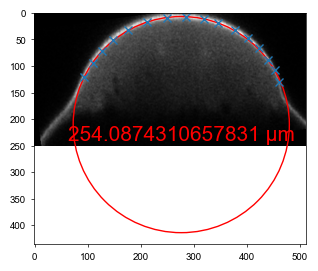

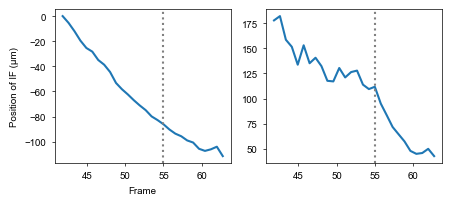

rep 73


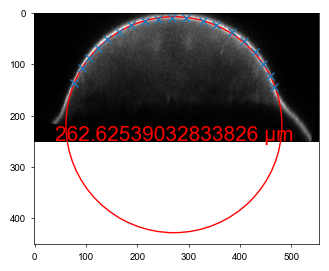

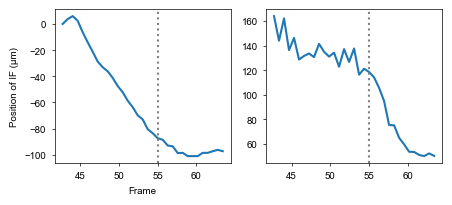

rep 74


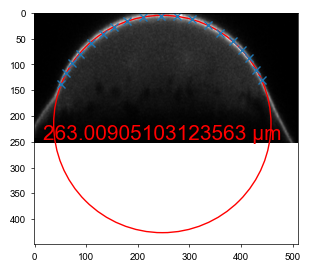

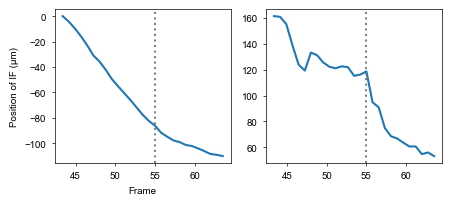

rep 79


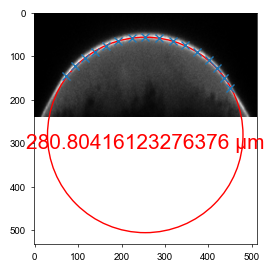

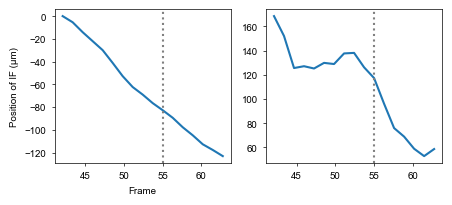

rep 81


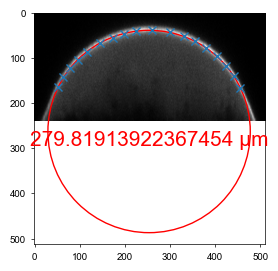

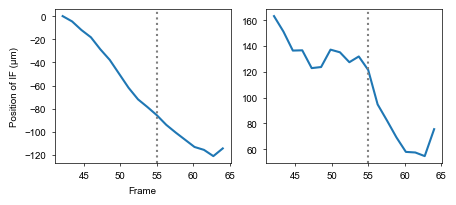

rep 85


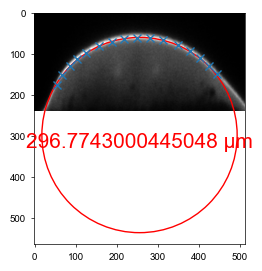

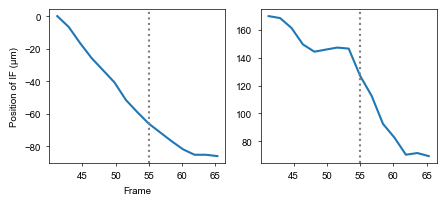

rep 87


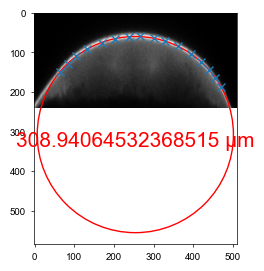

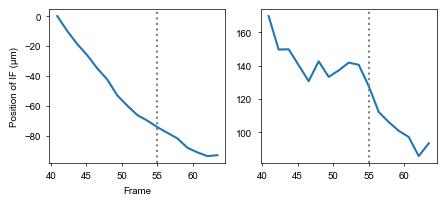

rep 88


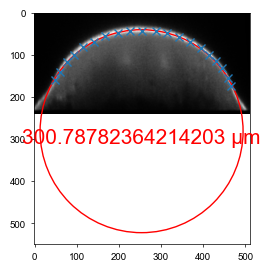

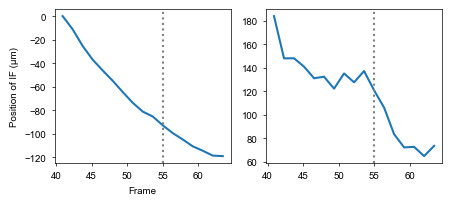

rep 89


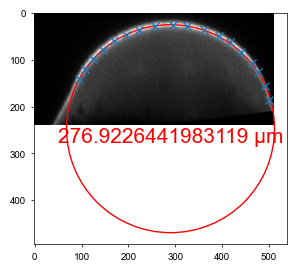

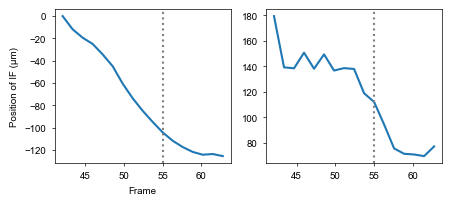

rep 90


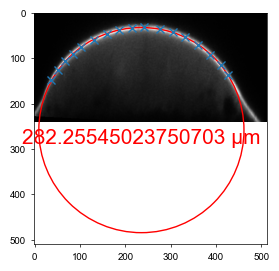

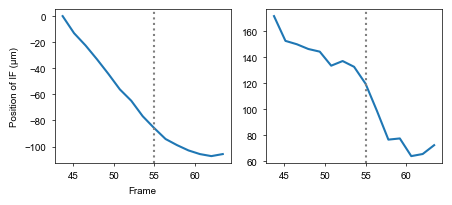

rep 91


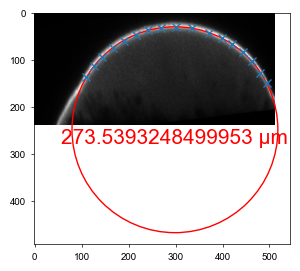

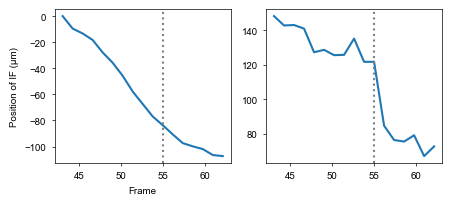

rep 92


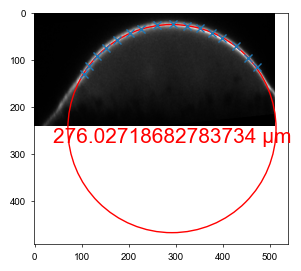

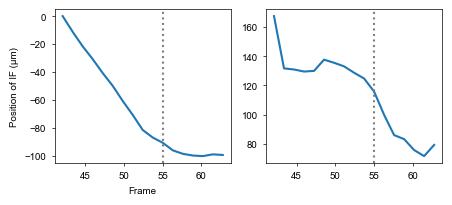

In [29]:
# cafree processing

cafree_info = []
cafree_folder = "B:\\home\\Xin home drive\\data_meroblastic\\actin\\cafree"

for i in cafree_replicates_info.index:
# for i in range(8):

    replicate = cafree_replicates_info.loc[i]
    print('rep', replicate.rep)

    replicate_file_name = cafree_folder + '\\' + replicate.experiment + '\\' + replicate.embryo + '\\furrowtip.csv'
    
    # import the data
    replicate_mt_cp = pd.read_csv(replicate_file_name)
    if 'Slice' in replicate_mt_cp.columns:
        replicate_mt_cp = replicate_mt_cp.rename({'Slice':'Frame'}, axis='columns')

    replicate_mt_cp = replicate_mt_cp[['X', 'Y', 'Frame']].sort_values(['Frame', 'Y']).reset_index().drop(columns='index')

   # impor the data (furrow angle)
    replicate_file_name_angle = cafree_folder + '\\' + replicate.experiment + '\\' + replicate.embryo + '\\sectionmidy_angle_measurement.csv'
    replicate_angle = pd.read_csv(replicate_file_name_angle)['0']

    # basic info
    pixel_size, time_interval = replicate.pixel_size, replicate.time_interval
    m1, m2 = replicate.m1, replicate.m2
    septum1, ck1 = replicate.septum1, int(replicate.ck1)
    i2 = replicate.i2

    # radius_0
    replicate_file_name_r0_fit_circle = cafree_folder + '\\' + replicate.experiment + '\\' + replicate.embryo + '\\r0_fit_circle.csv'
    replicate_r0_fit_circle = pd.read_csv(replicate_file_name_r0_fit_circle)[['X', 'Y']]
    circle_points = np.array(replicate_r0_fit_circle) / pixel_size
    fit_circle_xc, fit_circle_yc, fit_circle_r = fit_circle(circle_points)

    movie_sectionmidy = cafree_folder + '\\' + replicate.experiment + '\\' + replicate.embryo + '\\sectionmidy.tif'
    movie_sectionmidy = skimage.io.imread(movie_sectionmidy)
    if len(movie_sectionmidy.shape) == 4:
        movie_frame_r0_fit_circle = movie_sectionmidy[ck1-2, 1]
    elif len(movie_sectionmidy.shape) == 3:
        movie_frame_r0_fit_circle = movie_sectionmidy[ck1-2]

    fig,ax=plt.subplots(figsize=[4,3])
    ax.imshow(movie_frame_r0_fit_circle, cmap='Greys_r')
    ax.plot(circle_points[:,0], circle_points[:, 1], 'x')
    circle = mpl.patches.Circle(xy=(fit_circle_xc, fit_circle_yc), radius=fit_circle_r, fill=False, ec='red')
    ax.add_patch(circle)
    ax.text(fit_circle_xc, fit_circle_yc+30, str(fit_circle_r*pixel_size) + ' \u03BCm', color = 'red' , ha = 'center', fontsize=15)
    plt.show()
    r_0 = fit_circle_r*pixel_size

    # data itself
    if_position_phase1 = replicate_mt_cp[replicate_mt_cp.Frame<500].Y.values
    # if_position_phase2 = replicate_mt_cp[replicate_mt_cp.Frame>=septum1].Y.values[1::2]
    # cp_position_phase2 = replicate_mt_cp[replicate_mt_cp.Frame>=septum1].Y.values[0::2]
    frame_phase1 = replicate_mt_cp[replicate_mt_cp.Frame<500].Frame.values
    # frame_phase2 = np.unique(replicate_mt_cp[replicate_mt_cp.Frame>=septum1].Frame.values)
    # if_position_phase1 = replicate_mt_cp[replicate_mt_cp.Frame<septum1].Y.values
    # if_position_phase2 = replicate_mt_cp[replicate_mt_cp.Frame>=septum1].Y.values[1::2]
    # cp_position_phase2 = replicate_mt_cp[replicate_mt_cp.Frame>=septum1].Y.values[0::2]
    # frame_phase1 = replicate_mt_cp[replicate_mt_cp.Frame<septum1].Frame.values
    # frame_phase2 = np.unique(replicate_mt_cp[replicate_mt_cp.Frame>=septum1].Frame.values)

    angle_phase1 = np.array(replicate_angle)
    
    # connect them
    # if_position_phase2 = np.insert(if_position_phase2, 0, if_position_phase1[-1])
    # cp_position_phase2 = np.insert(cp_position_phase2, 0, if_position_phase1[-1])
    # frame_phase2 = np.insert(frame_phase2, 0, frame_phase1[-1])

    # displacement
    if_displacement_phase1 = if_position_phase1[-1] - if_position_phase1[0]
    # if_displacement_phase2 = if_position_phase2[-1] - if_position_phase2[0]
    
    # save the data
    if_position_phase1_normalized = 0-(if_position_phase1 - if_position_phase1[0])
    # if_position_phase2_normalized = -(if_position_phase1[0] - if_position_phase2)
    # cp_position_phase2_normalized = -(if_position_phase1[0] - cp_position_phase2)

    time_phase1 = (frame_phase1 - m2)/(i2-m2)*(39.5-55) + 55
    # time_phase2 = (frame_phase2 - m2)/(m1-m2)*(30-55) + 55
    
    replicate_info = {'name': 'Replicate ' + str(replicate.rep),
                      'data': [if_position_phase1_normalized, _, _, #0,1,2
                               time_phase1, _, #3,4
                               if_displacement_phase1, _, #5,6
                               _, _, #7,8
                               angle_phase1, _, #9,10
                               fit_circle_r*pixel_size]} #11
    
    cafree_info.append(replicate_info)

    fig, [ax, ax1] = plt.subplots(1,2,figsize=[5,2])
    ax.plot(time_phase1, if_position_phase1_normalized)
    # ax.plot(time_phase2, if_position_phase2_normalized)
    # ax.plot(time_phase2, cp_position_phase2_normalized)
    ax.axvline(x = 55, color='grey', linestyle='dotted')
    # ax.invert_yaxis()
    ax.set_xlabel('Frame')
    ax.set_ylabel('Position of IF (\u03BCm)')

    ax1.plot(time_phase1, angle_phase1, color='tab:blue')
    # ax1.plot(time_phase2, angle_phase2, color='tab:orange')
    ax1.axvline(x = 55, color='grey', linestyle='dotted')
    plt.show()

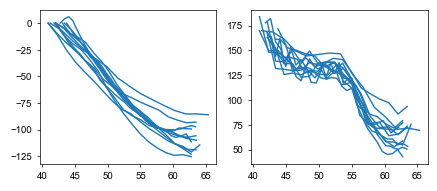

In [30]:
fig, [ax, ax1] = plt.subplots(1,2,figsize=[5,2])

# plot each individual replicate
for i in cafree_replicates_info.index:
    # print('rep', replicates_info.rep[i])

    if_displacement_phase1, if_displacement_phase2, cp_displacement_phase2, time_phase1, time_phase2 = cafree_info[i]['data'][:5]
    angle_phase1, angle_phase2 = cafree_info[i]['data'][9:11]
    
    # print(time_phase1[0], time_phase2[-1])
    
    lw, alpha = 1,  1
    ax.plot(time_phase1, if_displacement_phase1, color='tab:blue', lw=lw, zorder=-2, alpha=alpha)
    # ax.plot(time_phase2, if_displacement_phase2, color='tab:orange', lw=lw, zorder=-1, alpha=alpha)
    # ax.plot(time_phase2, cp_displacement_phase2, color='tab:green', lw=lw, zorder=0, alpha=alpha)

    ax1.plot(time_phase1, angle_phase1, color='tab:blue', lw=lw, zorder=-2, alpha=alpha)
    # ax1.plot(time_phase2, angle_phase2, color='tab:orange', lw=lw, zorder=-1, alpha=alpha)
    
# ax.invert_yaxis()
plt.show()

rep 71
rep 73
rep 74
rep 79
rep 81
rep 85
rep 87
rep 88
rep 89
rep 90
rep 91
rep 92


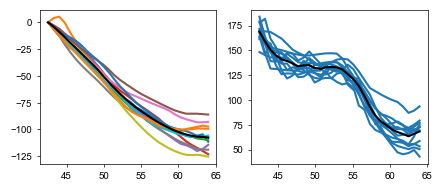

In [31]:
# average the cafree displacements without r_0

time_phase1_interp_cafree = np.linspace(42.5, 64, 30)
# time_phase1_interp = np.linspace(42.5, 57.5, 20)
# time_phase2_interp = np.linspace(57.5, 64, 10)

if_displacement_phase1_interp = []
# if_displacement_phase2_interp = []
# cp_displacement_phase2_interp = []
angle_phase1_interp = []

fig, [ax, ax1] = plt.subplots(1,2,figsize=[5,2])

for i in cafree_replicates_info.index:
# for i in[0]:
    print('rep', cafree_replicates_info.rep[i])

    # if_displacement_phase1
    if_displacement_phase1 = cafree_info[i]['data'][0]
    if_displacement_phase1_newtime = np.linspace(42.5, 64, len(if_displacement_phase1))
    # spl = CubicSpline(if_displacement_phase1_newtime, if_displacement_phase1)
    # if_displacement_phase1_new = spl(time_phase1_interp_cafree)
    if_displacement_phase1_new = np.interp(x=time_phase1_interp_cafree, xp=if_displacement_phase1_newtime, fp=if_displacement_phase1)
    if_displacement_phase1_interp.append(if_displacement_phase1_new)


    ax.plot(time_phase1_interp_cafree, if_displacement_phase1_new, label = cafree_replicates_info.rep[i])
    # ax.plot(time_phase2_interp, if_displacement_phase2_new, color='tab:orange')
    # ax.plot(time_phase2_interp, cp_displacement_phase2_new, color='tab:green')

    # angle interp
    angle_phase1 = cafree_info[i]['data'][9]
    angle_phase1_newtime = np.linspace(42.5, 64, len(angle_phase1))
    # spl = CubicSpline(angle_phase1_newtime, angle_phase1)
    # angle_phase1_new = spl(time_phase1_interp_cafree)
    angle_phase1_new = np.interp(x=time_phase1_interp_cafree, xp=angle_phase1_newtime, fp=angle_phase1)
    angle_phase1_interp.append(angle_phase1_new)

    ax1.plot(time_phase1_interp_cafree, angle_phase1_new, color='tab:blue')


if_displacement_phase1_interp = np.array(if_displacement_phase1_interp)
# if_displacement_phase2_interp = np.array(if_displacement_phase2_interp)
# cp_displacement_phase2_interp = np.array(cp_displacement_phase2_interp)
angle_phase1_interp = np.array(angle_phase1_interp)

if_cp_averaged_cafree_wo_r0 = []
for list in [if_displacement_phase1_interp, angle_phase1_interp]:
    if_cp_averaged_cafree_wo_r0.append(np.average(list, axis=0))
    if_cp_averaged_cafree_wo_r0.append(np.std(list, axis=0))

ax.plot(time_phase1_interp_cafree, if_cp_averaged_cafree_wo_r0[0], color="black")
ax1.plot(time_phase1_interp_cafree, if_cp_averaged_cafree_wo_r0[2], color="black")

# ax.invert_yaxis()
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, fontsize=12)
plt.show()

rep 71
rep 73
rep 74
rep 79
rep 81
rep 85
rep 87
rep 88
rep 89
rep 90
rep 91
rep 92


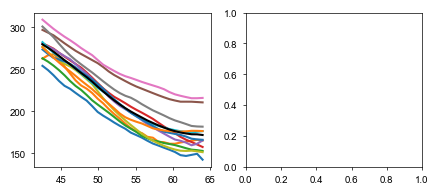

In [32]:
# average the cafree displacements with r_0

time_phase1_interp_cafree = np.linspace(42.5, 64, 30)
# time_phase1_interp = np.linspace(42.5, 57.5, 20)
# time_phase2_interp = np.linspace(57.5, 64, 10)

if_displacement_phase1_interp_wr0 = []
# if_displacement_phase2_interp = []
# cp_displacement_phase2_interp = []
# angle_phase1_interp = []

fig, [ax, ax1] = plt.subplots(1,2,figsize=[5,2])

for i in cafree_replicates_info.index:
# for i in[0]:
    print('rep', cafree_replicates_info.rep[i])
    r_0 = cafree_info[i]['data'][11]

    # if_displacement_phase1
    if_displacement_phase1 = cafree_info[i]['data'][0] + r_0
    if_displacement_phase1_newtime = np.linspace(42.5, 64, len(if_displacement_phase1))
    # spl = CubicSpline(if_displacement_phase1_newtime, if_displacement_phase1)
    # if_displacement_phase1_new = spl(time_phase1_interp_cafree)
    if_displacement_phase1_new = np.interp(x=time_phase1_interp_cafree, xp=if_displacement_phase1_newtime, fp=if_displacement_phase1)
    if_displacement_phase1_interp_wr0.append(if_displacement_phase1_new)


    ax.plot(time_phase1_interp_cafree, if_displacement_phase1_new, label = cafree_replicates_info.rep[i])
    # ax.plot(time_phase2_interp, if_displacement_phase2_new, color='tab:orange')
    # ax.plot(time_phase2_interp, cp_displacement_phase2_new, color='tab:green')


if_displacement_phase1_interp_wr0 = np.array(if_displacement_phase1_interp_wr0)
# if_displacement_phase2_interp = np.array(if_displacement_phase2_interp)
# cp_displacement_phase2_interp = np.array(cp_displacement_phase2_interp)

if_cp_averaged_cafree_w_r0 = []
for list in [if_displacement_phase1_interp_wr0]:
    if_cp_averaged_cafree_w_r0.append(np.average(list, axis=0))
    if_cp_averaged_cafree_w_r0.append(np.std(list, axis=0))

ax.plot(time_phase1_interp_cafree, if_cp_averaged_cafree_w_r0[0], color="black")

# ax.invert_yaxis()
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, fontsize=12)
plt.show()

rep 71
rep 73
rep 74
rep 79
rep 81
rep 85
rep 87
rep 88
rep 89
rep 90
rep 91
rep 92


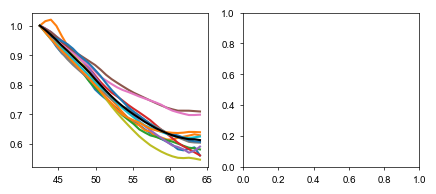

In [33]:
# average the cafree displacements with r_0

time_phase1_interp_cafree = np.linspace(42.5, 64, 30)
# time_phase1_interp = np.linspace(42.5, 57.5, 20)
# time_phase2_interp = np.linspace(57.5, 64, 10)

if_displacement_phase1_interp_wr0_2 = []
# if_displacement_phase2_interp = []
# cp_displacement_phase2_interp = []
# angle_phase1_interp = []

fig, [ax, ax1] = plt.subplots(1,2,figsize=[5,2])

for i in cafree_replicates_info.index:
# for i in[0]:
    print('rep', cafree_replicates_info.rep[i])
    r_0 = cafree_info[i]['data'][11]

    # if_displacement_phase1
    if_displacement_phase1 = cafree_info[i]['data'][0] / r_0 + 1
    if_displacement_phase1_newtime = np.linspace(42.5, 64, len(if_displacement_phase1))
    # spl = CubicSpline(if_displacement_phase1_newtime, if_displacement_phase1)
    # if_displacement_phase1_new = spl(time_phase1_interp_cafree)
    if_displacement_phase1_new = np.interp(x=time_phase1_interp_cafree, xp=if_displacement_phase1_newtime, fp=if_displacement_phase1)
    if_displacement_phase1_interp_wr0_2.append(if_displacement_phase1_new)


    ax.plot(time_phase1_interp_cafree, if_displacement_phase1_new, label = cafree_replicates_info.rep[i])
    # ax.plot(time_phase2_interp, if_displacement_phase2_new, color='tab:orange')
    # ax.plot(time_phase2_interp, cp_displacement_phase2_new, color='tab:green')


if_displacement_phase1_interp_wr0_2 = np.array(if_displacement_phase1_interp_wr0_2)
# if_displacement_phase2_interp = np.array(if_displacement_phase2_interp)
# cp_displacement_phase2_interp = np.array(cp_displacement_phase2_interp)

if_cp_averaged_cafree_w_r0_2 = []
for list in [if_displacement_phase1_interp_wr0_2]:
    if_cp_averaged_cafree_w_r0_2.append(np.average(list, axis=0))
    if_cp_averaged_cafree_w_r0_2.append(np.std(list, axis=0))

ax.plot(time_phase1_interp_cafree, if_cp_averaged_cafree_w_r0_2[0], color="black")

# ax.invert_yaxis()
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, fontsize=12)
plt.show()

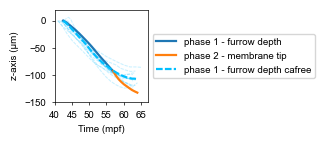

In [34]:
fig, ax = plt.subplots(figsize=[1.2, 1.2])

# plot each individual replicate
for i in wt_replicates_info.index:

    if_displacement_phase1, if_displacement_phase2, cp_displacement_phase2, time_phase1, time_phase2 = wt_info[i]['data'][:5]
    
    lw, alpha = 1,  0.2
    # ax.plot(time_phase1, if_displacement_phase1, color='tab:blue', lw=lw, zorder=-2, alpha=alpha)
    # ax.plot(time_phase2, if_displacement_phase2, color='tab:orange', lw=lw, zorder=-1, alpha=alpha)
    # ax.plot(time_phase2, cp_displacement_phase2, color='tab:green', lw=lw, zorder=0, alpha=alpha)

for i in cafree_replicates_info.index:
    # print('rep', replicates_info.rep[i])

    if_displacement_phase1, if_displacement_phase2, cp_displacement_phase2, time_phase1, time_phase2 = cafree_info[i]['data'][:5]
    
    lw, alpha = 0.8,  0.2
    ax.plot(time_phase1, if_displacement_phase1, color='deepskyblue',lw=lw, ls=(0,(3,1)), zorder=-2, alpha=alpha)


# plot the averaged
lw=1.6
ax.plot(time_phase1_interp, if_cp_averaged_wo_r0[0], color='tab:blue', lw=lw, zorder=5, label='phase 1 - furrow depth')
ax.plot(time_phase2_interp, if_cp_averaged_wo_r0[2], color='tab:orange', lw=lw, zorder=5, label='phase 2 - membrane tip')
# ax.plot(time_phase2_interp, if_cp_averaged[4], color='tab:green', lw=lw, zorder=2, label='phase 2 - contact point')
# ax.vlines(x=time_phase2_interp, ymin=if_cp_averaged[2], ymax=if_cp_averaged[4], color='tab:orange', lw=lw*0.3, zorder=1, label='phase 2 - contact point')

# plot the averaged cafree
lw=1.6
ax.plot(time_phase1_interp_cafree, if_cp_averaged_cafree_wo_r0[0], color='deepskyblue', lw=lw, ls=(0,(3,1)), zorder=10, label='phase 1 - furrow depth cafree')

# ax.axvline(x = 55, color='r', linestyle='dotted')

# ax.invert_yaxis()
ax.set_ylim(-150, 20)
# ax.set_yticks(np.arange(0, 181, 30)) 
ax.set_xlim(40, 67)
ax.set_xticks(np.arange(40, 70, 5)) 
ax.set_xlabel('Time (mpf)', fontsize=7)
ax.set_ylabel('z-axis (\u03BCm)', fontsize=7)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, fontsize=7)
plt.savefig('furrow_tip_displacement_wt_cafree.svg')
plt.show()

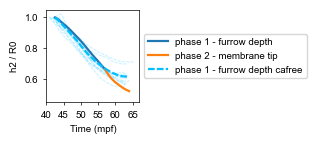

In [35]:
fig, ax = plt.subplots(figsize=[1.2, 1.2])

# plot each individual replicate
for i in wt_replicates_info.index:

    if_displacement_phase1, if_displacement_phase2, cp_displacement_phase2, time_phase1, time_phase2 = wt_info[i]['data'][:5]
    r_0 = wt_info[i]['data'][11]
    
    lw, alpha = 1,  0.2
    # ax.plot(time_phase1, if_displacement_phase1, color='tab:blue', lw=lw, zorder=-2, alpha=alpha)
    # ax.plot(time_phase2, if_displacement_phase2, color='tab:orange', lw=lw, zorder=-1, alpha=alpha)
    # ax.plot(time_phase2, cp_displacement_phase2, color='tab:green', lw=lw, zorder=0, alpha=alpha)

for i in cafree_replicates_info.index:
    # print('rep', replicates_info.rep[i])

    if_displacement_phase1, if_displacement_phase2, cp_displacement_phase2, time_phase1, time_phase2 = cafree_info[i]['data'][:5]
    r_0 = cafree_info[i]['data'][11]
    
    lw, alpha = 0.8,  0.2
    ax.plot(time_phase1, if_displacement_phase1/r_0+1, color='deepskyblue',lw=lw, ls=(0,(3,1)), zorder=-2, alpha=alpha)


# plot the averaged
lw=1.6
ax.plot(time_phase1_interp, if_cp_averaged_w_r0_2[0], color='tab:blue', lw=lw, zorder=5, label='phase 1 - furrow depth')
ax.plot(time_phase2_interp, if_cp_averaged_w_r0_2[2], color='tab:orange', lw=lw, zorder=5, label='phase 2 - membrane tip')
# ax.plot(time_phase2_interp, if_cp_averaged[4], color='tab:green', lw=lw, zorder=2, label='phase 2 - contact point')
# ax.vlines(x=time_phase2_interp, ymin=if_cp_averaged[2], ymax=if_cp_averaged[4], color='tab:orange', lw=lw*0.3, zorder=1, label='phase 2 - contact point')

# plot the averaged cafree
lw=1.6
ax.plot(time_phase1_interp_cafree, if_cp_averaged_cafree_w_r0_2[0], color='deepskyblue', lw=lw, ls=(0,(3,1)), zorder=10, label='phase 1 - furrow depth cafree')

# ax.axvline(x = 55, color='r', linestyle='dotted')

# ax.invert_yaxis()
ax.set_ylim(0.45, 1.05)
# ax.set_ylim(0.5, 1)
# ax.set_yticks(np.arange(0, 181, 30)) 
ax.set_xlim(40, 67)
ax.set_xticks(np.arange(40, 70, 5)) 
ax.set_xlabel('Time (mpf)', fontsize=7)
ax.set_ylabel('h2 / R0', fontsize=7)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, fontsize=7)
plt.savefig('furrow_tip_displacement_wt_cafree2.svg')
plt.show()

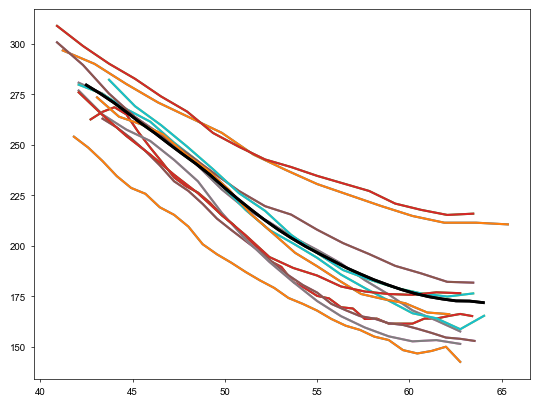

In [36]:
# export h1 h2

folder = 'furrow_position_cafree_h1h2'
create_folder(folder)


for i in cafree_replicates_info.index:
    if_displacement_phase1, if_displacement_phase2, cp_displacement_phase2, time_phase1, time_phase2 = cafree_info[i]['data'][:5]
    r_0 = cafree_info[i]['data'][11]

    time_phase12 = time_phase1
    h_1 = if_displacement_phase1 + r_0
    h_2 = h_1
    np.save(folder + "\\" + cafree_info[i]['name'] + "_time_h1_h2.npy", [time_phase12, h_1, h_2])

    plt.plot(time_phase12, h_1)
    plt.plot(time_phase12, h_2)

time_phase12 = time_phase1_interp_cafree
h_1 = if_cp_averaged_cafree_w_r0[0]
h_2 = h_1
np.save(folder + "\\cafree_avg_time_h1_h2.npy", [time_phase12, h_1, h_2])

plt.plot(time_phase12, h_1, color='black', lw=2)
plt.plot(time_phase12, h_2, color='black', lw=2)

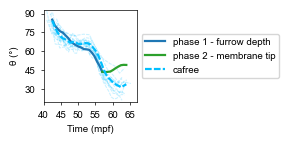

In [37]:
fig, ax = plt.subplots(figsize=[1.2, 1.2])

# plot each individual replicate
for i in wt_replicates_info.index:
    # print('rep', replicates_info.rep[i])

    if_displacement_phase1, if_displacement_phase2, cp_displacement_phase2, time_phase1, time_phase2 = wt_info[i]['data'][:5]
    angle_phase1, angle_phase2 = wt_info[i]['data'][9:11]
    # print(time_phase1[0], time_phase2[-1])
    
    lw, alpha = 0.8,  0.2
    # ax.plot(time_phase1, if_displacement_phase1, color='tab:blue', lw=lw, zorder=-2, alpha=alpha)
    # ax.plot(time_phase2, if_displacement_phase2, color='tab:orange', lw=lw, zorder=-1, alpha=alpha)
    # ax.plot(time_phase2, cp_displacement_phase2, color='tab:green', lw=lw, zorder=0, alpha=alpha)

    # ax.plot(time_phase1, angle_phase1/2, color='tab:blue', lw=lw, zorder=-3, alpha=alpha)
    # ax.plot(time_phase2, angle_phase2/2, color='tab:green', lw=lw, zorder=-2, alpha=alpha)


for i in cafree_replicates_info.index:
    # print('rep', replicates_info.rep[i])

    if_displacement_phase1, if_displacement_phase2, cp_displacement_phase2, time_phase1, time_phase2 = cafree_info[i]['data'][:5]
    angle_phase1, angle_phase2 = cafree_info[i]['data'][9:11]
    
    lw, alpha = .8,  0.2
    ax.plot(time_phase1, angle_phase1/2, color='deepskyblue', lw=lw, ls=(0,(3,1)), zorder=-1, alpha=alpha)

# plot the averaged
lw=1.6
# ax.plot(time_phase1_interp, if_cp_averaged[0], color='tab:blue', lw=lw, zorder=1, label='phase 1 - furrow depth')
# ax.plot(time_phase2_interp, if_cp_averaged[2], color='tab:orange', lw=lw, zorder=1, label='phase 2 - membrane tip')
# ax.plot(time_phase2_interp, if_cp_averaged[4], color='tab:green', lw=lw, zorder=2, label='phase 2 - contact point')
# ax.vlines(x=time_phase2_interp, ymin=if_cp_averaged[2], ymax=if_cp_averaged[4], color='tab:orange', lw=lw*0.3, zorder=1, label='phase 2 - contact point')

ax.plot(time_phase1_interp, if_cp_averaged_wo_r0[6]/2, color='tab:blue', lw=lw, zorder=1, label='phase 1 - furrow depth')
ax.plot(time_phase2_interp, if_cp_averaged_wo_r0[8]/2, color='tab:green', lw=lw, zorder=1, label='phase 2 - membrane tip')
ax.plot(time_phase1_interp_cafree, if_cp_averaged_cafree_wo_r0[2]/2, color='deepskyblue', ls=(0,(3,1)),lw=lw, zorder=1, label='cafree')


# ax.axvline(x = 55, color='r', linestyle='dotted')

# ax.invert_yaxis()
ax.set_ylim(20, 93)
ax.set_yticks(np.arange(30, 91, 15)) 
ax.set_xlim(40, 67)
ax.set_xticks(np.arange(40, 70, 5)) 
ax.set_xlabel('Time (mpf)', fontsize=7)
ax.set_ylabel('θ (°)', fontsize=7)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, fontsize=7)
plt.savefig('furrow_angle_wt_cafree.svg')
plt.show()

In [38]:
np.save('angle_wt_phase1.npy', np.array([time_phase1_interp, if_cp_averaged_wo_r0[6]]))
np.save('angle_wt_phase2.npy', np.array([time_phase2_interp, if_cp_averaged_wo_r0[8]]))
np.save('angle_cafree.npy', np.array([time_phase1_interp_cafree, if_cp_averaged_cafree_wo_r0[2]]))


In [39]:
data_info = pd.read_excel('B:\\home\\Xin home drive\\data_meroblastic\\majority_data_info.xlsx')
carhoa_replicates_info = data_info[data_info['furrow_indentation']=='carhoa'].reset_index()
carhoa_replicates_info

,index,rep,experiment,Unnamed: 2,embryo,type,Unnamed: 5,time_interval,pixel_size,voxel_depth,...,staging,furrow_indentation,furrow_indentation_r0_(frame_ck-1),correction,contact_angle,contact_angle_parameters,cortical_actin_intensity_quanti,cortical_actin_intensity_quanti1,cortical_actin_intensity_quanti2,geometry
0,110,111,XIN230823_LSM9001_dclk_utr_300pgcaRhoA,NaN,e1,beside,"one side affected, beside",47.29,1.2479,NaN,...,NaN,carhoa,NaN,0,carhoa,NaN,NaN,NaN,NaN,NaN
1,111,112,XIN230823_LSM9001_dclk_utr_300pgcaRhoA,NaN,e2,through,kinda through,47.33,1.2479,NaN,...,NaN,carhoa,NaN,0,carhoa,NaN,NaN,NaN,NaN,NaN
2,112,113,XIN230823_LSM9001_dclk_utr_300pgcaRhoA,NaN,e3,beside,"one side affected, beside, far away",47.34,1.2479,NaN,...,NaN,carhoa,NaN,0,carhoa,NaN,NaN,NaN,NaN,NaN
3,113,114,xin240418_lsm9001_egfp_300pgcarhoa,NaN,e1,no,not affecting too much at 1-cell stage,46.25,1.2479,NaN,...,NaN,carhoa,NaN,0,carhoa,NaN,NaN,NaN,NaN,NaN
4,114,115,xin240418_lsm9001_egfp_300pgcarhoa,NaN,e2,all,universally increasing,46.57,1.2479,NaN,...,NaN,carhoa,NaN,7.587,carhoa,NaN,NaN,NaN,NaN,NaN
5,115,116,xin240418_lsm9001_egfp_300pgcarhoa,NaN,e3,through,"one side affected, through",46.23,1.2479,NaN,...,NaN,carhoa,NaN,0,carhoa,NaN,NaN,NaN,NaN,NaN
6,116,117,xin240419_lsm9001_utregfp_carhoa300pg,NaN,e1,all,"looks like affected, but maybe universal",46.28,1.2479,NaN,...,NaN,carhoa,NaN,0,carhoa,NaN,NaN,NaN,NaN,NaN
7,117,118,xin240419_lsm9001_utregfp_carhoa300pg,NaN,e2,beside,"one side affected, beside",46.52,1.2479,NaN,...,NaN,carhoa,NaN,0,carhoa,NaN,NaN,NaN,NaN,NaN
8,118,119,xin240502_lsm9001_utregfp_carhoa300pg,NaN,e1,through,"one side affected, through",46.06,1.2479,NaN,...,NaN,carhoa,NaN,0,carhoa,NaN,NaN,NaN,NaN,NaN
9,120,121,xin240502_lsm9001_utregfp_carhoa300pg,NaN,e3,beside,"one side affected, beside",46.09,1.2479,NaN,...,NaN,carhoa,NaN,-15.18,carhoa,NaN,NaN,NaN,NaN,NaN


rep 111


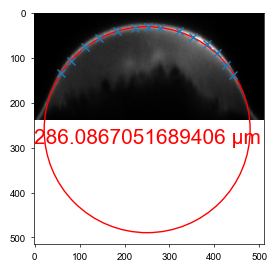

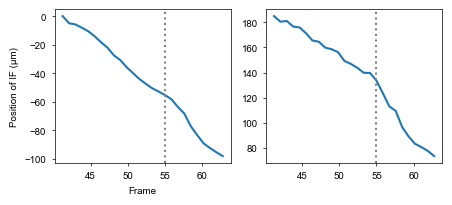

rep 112


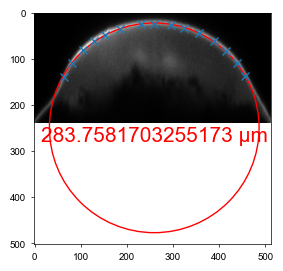

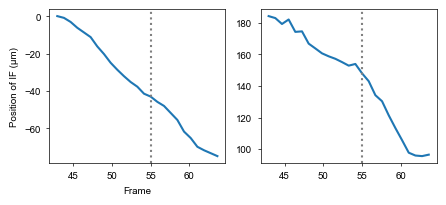

rep 113


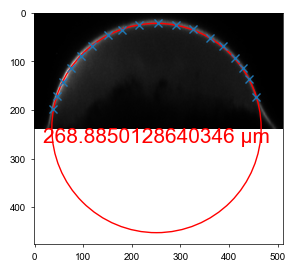

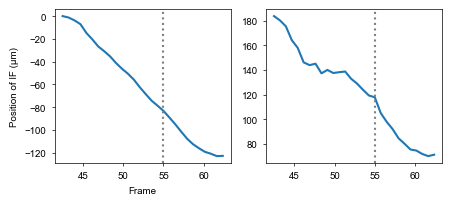

rep 114


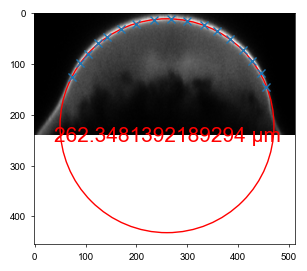

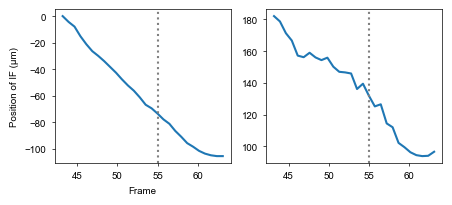

rep 115


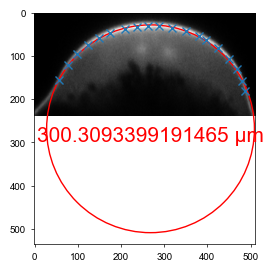

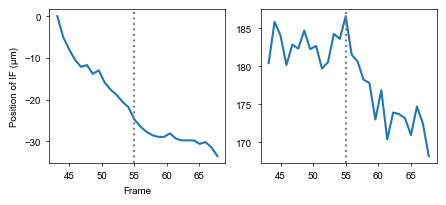

rep 116


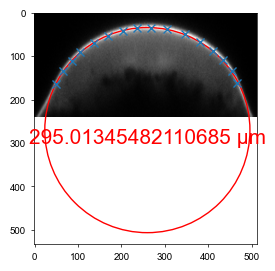

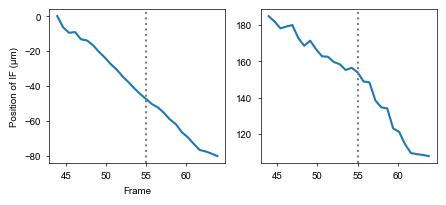

rep 117


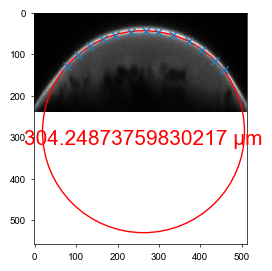

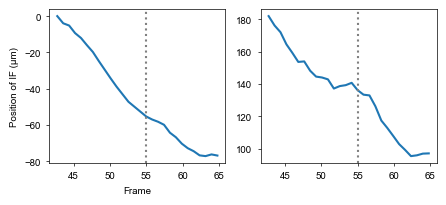

rep 118


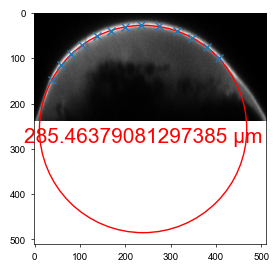

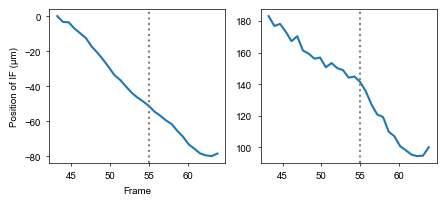

rep 119


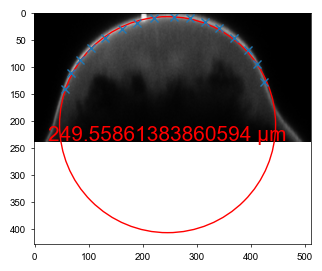

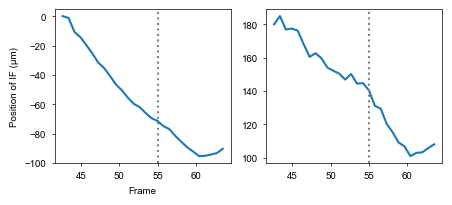

rep 121


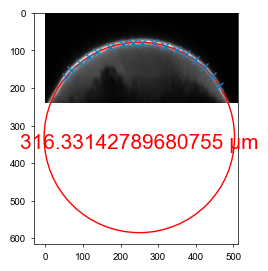

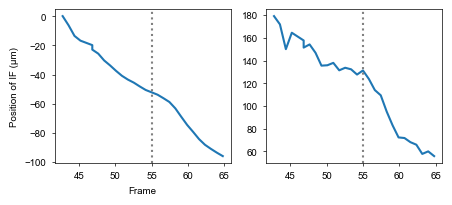

rep 122


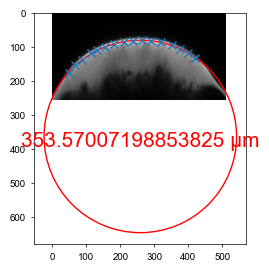

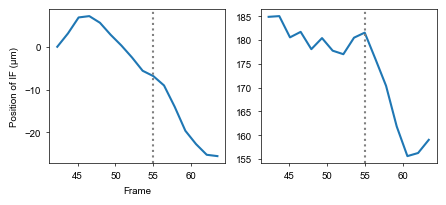

In [40]:
# carhoa processing

carhoa_info = []
carhoa_folder = "B:\\home\\Xin home drive\\data_meroblastic\\actin\\caRhoA\\low_mag"

for i in carhoa_replicates_info.index:
# for i in range(8):

    replicate = carhoa_replicates_info.loc[i]
    print('rep', replicate.rep)

    replicate_file_name = carhoa_folder + '\\' + replicate.experiment + '\\' + replicate.embryo + '\\furrowtip.csv'
    
    # import the data
    replicate_mt_cp = pd.read_csv(replicate_file_name)
    if 'Slice' in replicate_mt_cp.columns:
        replicate_mt_cp = replicate_mt_cp.rename({'Slice':'Frame'}, axis='columns')

    replicate_mt_cp = replicate_mt_cp[['X', 'Y', 'Frame']].sort_values(['Frame', 'Y']).reset_index().drop(columns='index')

    # import the data (furrow angle)
    replicate_file_name_angle = carhoa_folder + '\\' + replicate.experiment + '\\' + replicate.embryo + '\\sectionmidy_angle_measurement.csv'
    replicate_angle = pd.read_csv(replicate_file_name_angle)['0']

    # basic info
    pixel_size, time_interval = replicate.pixel_size, replicate.time_interval
    m1, m2 = replicate.m1, replicate.m2
    septum1, ck1 = replicate.septum1, int(replicate.ck1)
    i2 = replicate.i2

    # radius_0
    replicate_file_name_r0_fit_circle = carhoa_folder + '\\' + replicate.experiment + '\\' + replicate.embryo + '\\r0_fit_circle.csv'
    replicate_r0_fit_circle = pd.read_csv(replicate_file_name_r0_fit_circle)[['X', 'Y']]
    circle_points = np.array(replicate_r0_fit_circle) / pixel_size
    fit_circle_xc, fit_circle_yc, fit_circle_r = fit_circle(circle_points)

    movie_sectionmidy = carhoa_folder + '\\' + replicate.experiment + '\\' + replicate.embryo + '\\sectionmidy.tif'
    movie_sectionmidy = skimage.io.imread(movie_sectionmidy)
    if len(movie_sectionmidy.shape) == 4:
        movie_frame_r0_fit_circle = movie_sectionmidy[ck1-2, 1]
    elif len(movie_sectionmidy.shape) == 3:
        movie_frame_r0_fit_circle = movie_sectionmidy[ck1-2]

    fig,ax=plt.subplots(figsize=[4,3])
    ax.imshow(movie_frame_r0_fit_circle, cmap='Greys_r')
    ax.plot(circle_points[:,0], circle_points[:, 1], 'x')
    circle = mpl.patches.Circle(xy=(fit_circle_xc, fit_circle_yc), radius=fit_circle_r, fill=False, ec='red')
    ax.add_patch(circle)
    ax.text(fit_circle_xc, fit_circle_yc+30, str(fit_circle_r*pixel_size) + ' \u03BCm', color = 'red' , ha = 'center', fontsize=15)
    plt.show()
    r_0 = fit_circle_r*pixel_size

    # data itself
    if_position_phase1 = replicate_mt_cp[replicate_mt_cp.Frame<500].Y.values
    if_position_phase1 = if_position_phase1 / math.cos(math.radians(abs(replicate.correction)))
    # # if_position_phase2 = replicate_mt_cp[replicate_mt_cp.Frame>=septum1].Y.values[1::2]
    # # cp_position_phase2 = replicate_mt_cp[replicate_mt_cp.Frame>=septum1].Y.values[0::2]
    frame_phase1 = replicate_mt_cp[replicate_mt_cp.Frame<500].Frame.values
    # # frame_phase2 = np.unique(replicate_mt_cp[replicate_mt_cp.Frame>=septum1].Frame.values)
    # # if_position_phase1 = replicate_mt_cp[replicate_mt_cp.Frame<septum1].Y.values
    # # if_position_phase2 = replicate_mt_cp[replicate_mt_cp.Frame>=septum1].Y.values[1::2]
    # # cp_position_phase2 = replicate_mt_cp[replicate_mt_cp.Frame>=septum1].Y.values[0::2]
    # # frame_phase1 = replicate_mt_cp[replicate_mt_cp.Frame<septum1].Frame.values
    # # frame_phase2 = np.unique(replicate_mt_cp[replicate_mt_cp.Frame>=septum1].Frame.values)

    angle_phase1 = np.array(replicate_angle)
    
    # # connect them
    # # if_position_phase2 = np.insert(if_position_phase2, 0, if_position_phase1[-1])
    # # cp_position_phase2 = np.insert(cp_position_phase2, 0, if_position_phase1[-1])
    # # frame_phase2 = np.insert(frame_phase2, 0, frame_phase1[-1])

    # displacement
    if_displacement_phase1 = if_position_phase1[-1] - if_position_phase1[0]
    # # if_displacement_phase2 = if_position_phase2[-1] - if_position_phase2[0]
    
    # save the data
    if_position_phase1_normalized = 0-(if_position_phase1 - if_position_phase1[0])
    # # if_position_phase2_normalized = -(if_position_phase1[0] - if_position_phase2)
    # # cp_position_phase2_normalized = -(if_position_phase1[0] - cp_position_phase2)

    time_phase1 = (frame_phase1 - m2)/(i2-m2)*(39.5-55) + 55
    # # time_phase2 = (frame_phase2 - m2)/(m1-m2)*(30-55) + 55
    
    replicate_info = {'name': 'Replicate ' + str(replicate.rep),
                      'data': [if_position_phase1_normalized, _, _,
                               time_phase1, _,
                               if_displacement_phase1, _,
                               _, _,
                               angle_phase1, _,
                               fit_circle_r*pixel_size]}
    
    carhoa_info.append(replicate_info)

    fig, [ax, ax1] = plt.subplots(1,2,figsize=[5,2])
    ax.plot(time_phase1, if_position_phase1_normalized)
    # # ax.plot(time_phase2, if_position_phase2_normalized)
    # # ax.plot(time_phase2, cp_position_phase2_normalized)
    ax.axvline(x = 55, color='grey', linestyle='dotted')
    # ax.invert_yaxis()
    ax.set_xlabel('Frame')
    ax.set_ylabel('Position of IF (\u03BCm)')

    ax1.plot(time_phase1, angle_phase1, color='tab:blue')
    # ax1.plot(time_phase2, angle_phase2, color='tab:orange')
    ax1.axvline(x = 55, color='grey', linestyle='dotted')
    plt.show()

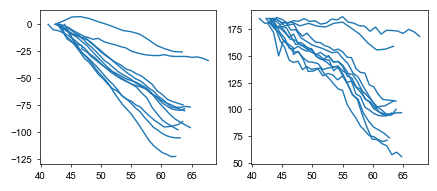

In [41]:
fig, [ax, ax1] = plt.subplots(1,2,figsize=[5,2])

# plot each individual replicate
for i in carhoa_replicates_info.index:
    # print('rep', replicates_info.rep[i])

    if_displacement_phase1, if_displacement_phase2, cp_displacement_phase2, time_phase1, time_phase2 = carhoa_info[i]['data'][:5]
    angle_phase1, angle_phase2 = carhoa_info[i]['data'][9:11]
    
    # print(time_phase1[0], time_phase2[-1])
    
    lw, alpha = 1,  1
    ax.plot(time_phase1, if_displacement_phase1, color='tab:blue', lw=lw, zorder=-2, alpha=alpha)
    # ax.plot(time_phase2, if_displacement_phase2, color='tab:orange', lw=lw, zorder=-1, alpha=alpha)
    # ax.plot(time_phase2, cp_displacement_phase2, color='tab:green', lw=lw, zorder=0, alpha=alpha)

    ax1.plot(time_phase1, angle_phase1, color='tab:blue', lw=lw, zorder=-2, alpha=alpha)
    # ax1.plot(time_phase2, angle_phase2, color='tab:orange', lw=lw, zorder=-1, alpha=alpha)
    
# ax.invert_yaxis()
plt.show()

rep 111
rep 112
rep 113
rep 114
rep 115
rep 116
rep 117
rep 118
rep 119
rep 121
rep 122


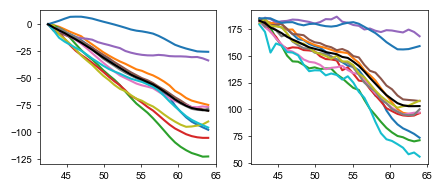

In [42]:
# average the carhoa displacements

time_phase1_interp_carhoa = np.linspace(42.5, 64, 30)
# time_phase1_interp = np.linspace(42.5, 57.5, 20)
# time_phase2_interp = np.linspace(57.5, 64, 10)

if_displacement_phase1_interp = []
# if_displacement_phase2_interp = []
# cp_displacement_phase2_interp = []
angle_phase1_interp = []

fig, [ax, ax1] = plt.subplots(1,2,figsize=[5,2])

for i in carhoa_replicates_info.index:
# for i in[0]:
    print('rep', carhoa_replicates_info.rep[i])

    # if_displacement_phase1
    if_displacement_phase1 = carhoa_info[i]['data'][0]
    if_displacement_phase1_newtime = np.linspace(42.5, 64, len(if_displacement_phase1))
    # if_displacement_phase1_newtime = np.linspace(42.5, 57.5, len(if_displacement_phase1))
    # spl = CubicSpline(if_displacement_phase1_newtime, if_displacement_phase1)
    # if_displacement_phase1_new = spl(time_phase1_interp_carhoa)
    if_displacement_phase1_new = np.interp(x=time_phase1_interp_carhoa, xp=if_displacement_phase1_newtime, fp=if_displacement_phase1)
    if_displacement_phase1_interp.append(if_displacement_phase1_new)

    # if_displacement_phase2 = cafree_info[i]['data'][1]
    # if_displacement_phase2_newtime = np.linspace(57.5, 64, len(if_displacement_phase2))
    # spl = CubicSpline(if_displacement_phase2_newtime, if_displacement_phase2)
    # if_displacement_phase2_new = spl(time_phase2_interp)
    # if_displacement_phase2_interp.append(if_displacement_phase2_new)
    
    # cp_displacement_phase2 = cafree_info[i]['data'][2]
    # spl = CubicSpline(if_displacement_phase2_newtime, cp_displacement_phase2)
    # cp_displacement_phase2_new = spl(time_phase2_interp)
    # cp_displacement_phase2_interp.append(cp_displacement_phase2_new)

    ax.plot(time_phase1_interp_carhoa, if_displacement_phase1_new, label = carhoa_replicates_info.rep[i])
    # ax.plot(time_phase2_interp, if_displacement_phase2_new, color='tab:orange')
    # ax.plot(time_phase2_interp, cp_displacement_phase2_new, color='tab:green')

    # angle interp
    angle_phase1 = carhoa_info[i]['data'][9]
    angle_phase1_newtime = np.linspace(42.5, 64, len(angle_phase1))
    # spl = CubicSpline(angle_phase1_newtime, angle_phase1)
    # angle_phase1_new = spl(time_phase1_interp_carhoa)
    angle_phase1_new = np.interp(x=time_phase1_interp_carhoa, xp=angle_phase1_newtime, fp=angle_phase1)
    angle_phase1_interp.append(angle_phase1_new)

    ax1.plot(time_phase1_interp_carhoa, angle_phase1_new, label=carhoa_replicates_info.rep[i])


if_displacement_phase1_interp = np.array(if_displacement_phase1_interp)
# if_displacement_phase2_interp = np.array(if_displacement_phase2_interp)
# cp_displacement_phase2_interp = np.array(cp_displacement_phase2_interp)
angle_phase1_interp = np.array(angle_phase1_interp)


if_cp_averaged_carhoa_wo_r0 = []
for list in [if_displacement_phase1_interp, angle_phase1_interp]:
    if_cp_averaged_carhoa_wo_r0.append(np.average(list, axis=0))
    if_cp_averaged_carhoa_wo_r0.append(np.std(list, axis=0))

ax.plot(time_phase1_interp_cafree, if_cp_averaged_carhoa_wo_r0[0], color="black")
ax1.plot(time_phase1_interp_cafree, if_cp_averaged_carhoa_wo_r0[2], color="black")

# ax.invert_yaxis()
# ax1.set_ylim(50, 200)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, fontsize=12)
plt.show()

rep 111
rep 112
rep 113
rep 114
rep 115
rep 116
rep 117
rep 118
rep 119
rep 121
rep 122


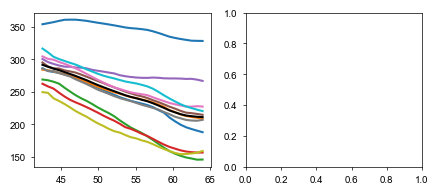

In [43]:
# average the cafree displacements with r_0

time_phase1_interp_carhoa = np.linspace(42.5, 64, 30)
# time_phase1_interp = np.linspace(42.5, 57.5, 20)
# time_phase2_interp = np.linspace(57.5, 64, 10)

if_displacement_phase1_interp_wr0 = []
# if_displacement_phase2_interp = []
# cp_displacement_phase2_interp = []
# angle_phase1_interp = []

fig, [ax, ax1] = plt.subplots(1,2,figsize=[5,2])

for i in carhoa_replicates_info.index:
# for i in[0]:
    print('rep', carhoa_replicates_info.rep[i])
    r_0 = carhoa_info[i]['data'][11]

    # if_displacement_phase1
    if_displacement_phase1 = carhoa_info[i]['data'][0] + r_0
    if_displacement_phase1_newtime = np.linspace(42.5, 64, len(if_displacement_phase1))
    # spl = CubicSpline(if_displacement_phase1_newtime, if_displacement_phase1)
    # if_displacement_phase1_new = spl(time_phase1_interp_cafree)
    if_displacement_phase1_new = np.interp(x=time_phase1_interp_cafree, xp=if_displacement_phase1_newtime, fp=if_displacement_phase1)
    if_displacement_phase1_interp_wr0.append(if_displacement_phase1_new)


    ax.plot(time_phase1_interp_cafree, if_displacement_phase1_new, label = cafree_replicates_info.rep[i])
    # ax.plot(time_phase2_interp, if_displacement_phase2_new, color='tab:orange')
    # ax.plot(time_phase2_interp, cp_displacement_phase2_new, color='tab:green')


if_displacement_phase1_interp_wr0 = np.array(if_displacement_phase1_interp_wr0)
# if_displacement_phase2_interp = np.array(if_displacement_phase2_interp)
# cp_displacement_phase2_interp = np.array(cp_displacement_phase2_interp)

if_cp_averaged_carhoa_w_r0 = []
for list in [if_displacement_phase1_interp_wr0]:
    if_cp_averaged_carhoa_w_r0.append(np.average(list, axis=0))
    if_cp_averaged_carhoa_w_r0.append(np.std(list, axis=0))

ax.plot(time_phase1_interp_carhoa, if_cp_averaged_carhoa_w_r0[0], color="black")

# ax.invert_yaxis()
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, fontsize=12)
plt.show()

rep 111
rep 112
rep 113
rep 114
rep 115
rep 116
rep 117
rep 118
rep 119
rep 121
rep 122


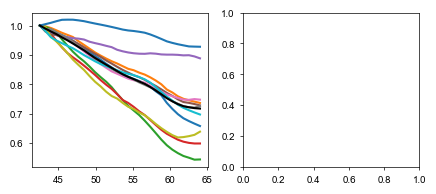

In [44]:
# average the cafree displacements with r_0

time_phase1_interp_carhoa = np.linspace(42.5, 64, 30)
# time_phase1_interp = np.linspace(42.5, 57.5, 20)
# time_phase2_interp = np.linspace(57.5, 64, 10)

if_displacement_phase1_interp_wr0_2 = []
# if_displacement_phase2_interp = []
# cp_displacement_phase2_interp = []
# angle_phase1_interp = []

fig, [ax, ax1] = plt.subplots(1,2,figsize=[5,2])

for i in carhoa_replicates_info.index:
# for i in[0]:
    print('rep', carhoa_replicates_info.rep[i])
    r_0 = carhoa_info[i]['data'][11]

    # if_displacement_phase1
    if_displacement_phase1 = carhoa_info[i]['data'][0] / r_0 + 1
    if_displacement_phase1_newtime = np.linspace(42.5, 64, len(if_displacement_phase1))
    # spl = CubicSpline(if_displacement_phase1_newtime, if_displacement_phase1)
    # if_displacement_phase1_new = spl(time_phase1_interp_cafree)
    if_displacement_phase1_new = np.interp(x=time_phase1_interp_cafree, xp=if_displacement_phase1_newtime, fp=if_displacement_phase1)
    if_displacement_phase1_interp_wr0_2.append(if_displacement_phase1_new)


    ax.plot(time_phase1_interp_cafree, if_displacement_phase1_new, label = cafree_replicates_info.rep[i])
    # ax.plot(time_phase2_interp, if_displacement_phase2_new, color='tab:orange')
    # ax.plot(time_phase2_interp, cp_displacement_phase2_new, color='tab:green')


if_displacement_phase1_interp_wr0_2 = np.array(if_displacement_phase1_interp_wr0_2)
# if_displacement_phase2_interp = np.array(if_displacement_phase2_interp)
# cp_displacement_phase2_interp = np.array(cp_displacement_phase2_interp)

if_cp_averaged_carhoa_w_r0_2 = []
for list in [if_displacement_phase1_interp_wr0_2]:
    if_cp_averaged_carhoa_w_r0_2.append(np.average(list, axis=0))
    if_cp_averaged_carhoa_w_r0_2.append(np.std(list, axis=0))

ax.plot(time_phase1_interp_carhoa, if_cp_averaged_carhoa_w_r0_2[0], color="black")

# ax.invert_yaxis()
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, fontsize=12)
plt.show()

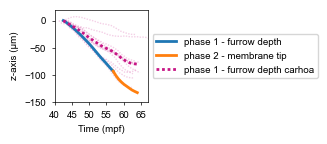

In [45]:
fig, ax = plt.subplots(figsize=[1.2, 1.2])

# plot each individual replicate
for i in wt_replicates_info.index:

    if_displacement_phase1, if_displacement_phase2, cp_displacement_phase2, time_phase1, time_phase2 = wt_info[i]['data'][:5]
    
    lw, alpha = 1,  0.2
    # ax.plot(time_phase1, if_displacement_phase1, color='tab:blue', lw=lw, zorder=-2, alpha=alpha)
    # ax.plot(time_phase2, if_displacement_phase2, color='tab:orange', lw=lw, zorder=-1, alpha=alpha)
    # ax.plot(time_phase2, cp_displacement_phase2, color='tab:green', lw=lw, zorder=0, alpha=alpha)

for i in carhoa_replicates_info.index:
    # print('rep', replicates_info.rep[i])

    if_displacement_phase1, if_displacement_phase2, cp_displacement_phase2, time_phase1, time_phase2 = carhoa_info[i]['data'][:5]
    
    lw, alpha = 1,  0.2
    ax.plot(time_phase1, if_displacement_phase1, color='mediumvioletred', lw=lw, ls=(0,(1,1)), zorder=0, alpha=alpha)


# plot the averaged
lw=2
ax.plot(time_phase1_interp, if_cp_averaged_wo_r0[0], color='tab:blue', lw=lw, zorder=5, label='phase 1 - furrow depth')
ax.plot(time_phase2_interp, if_cp_averaged_wo_r0[2], color='tab:orange', lw=lw, zorder=5, label='phase 2 - membrane tip')
# ax.plot(time_phase2_interp, if_cp_averaged[4], color='tab:green', lw=lw, zorder=2, label='phase 2 - contact point')
# ax.vlines(x=time_phase2_interp, ymin=if_cp_averaged[2], ymax=if_cp_averaged[4], color='tab:orange', lw=lw*0.3, zorder=1, label='phase 2 - contact point')

# plot the averaged cafree
lw=2
ax.plot(time_phase1_interp_carhoa, if_cp_averaged_carhoa_wo_r0[0], color='mediumvioletred', lw=lw, ls=(0,(1,1)), zorder=10, label='phase 1 - furrow depth carhoa')

# ax.axvline(x = 55, color='r', linestyle='dotted')

# ax.invert_yaxis()
ax.set_ylim(-150, 20)
# ax.set_yticks(np.arange(0, 181, 30)) 
ax.set_xlim(40, 67)
ax.set_xticks(np.arange(40, 70, 5)) 
ax.set_xlabel('Time (mpf)', fontsize=7)
ax.set_ylabel('z-axis (\u03BCm)', fontsize=7)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, fontsize=7)
plt.savefig('furrow_tip_displacement_wt_carhoa.svg')
plt.show()

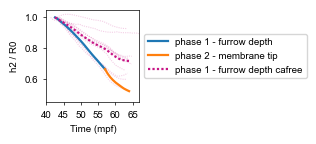

In [46]:
fig, ax = plt.subplots(figsize=[1.2, 1.2])

# plot each individual replicate
for i in wt_replicates_info.index:

    if_displacement_phase1, if_displacement_phase2, cp_displacement_phase2, time_phase1, time_phase2 = wt_info[i]['data'][:5]
    r_0 = wt_info[i]['data'][11]
    
    lw, alpha = 1,  0.2
    # ax.plot(time_phase1, if_displacement_phase1, color='tab:blue', lw=lw, zorder=-2, alpha=alpha)
    # ax.plot(time_phase2, if_displacement_phase2, color='tab:orange', lw=lw, zorder=-1, alpha=alpha)
    # ax.plot(time_phase2, cp_displacement_phase2, color='tab:green', lw=lw, zorder=0, alpha=alpha)

for i in carhoa_replicates_info.index:
    # print('rep', replicates_info.rep[i])

    if_displacement_phase1, if_displacement_phase2, cp_displacement_phase2, time_phase1, time_phase2 = carhoa_info[i]['data'][:5]
    r_0 = carhoa_info[i]['data'][11]
    
    lw, alpha = 0.8,  0.2
    ax.plot(time_phase1, if_displacement_phase1/r_0+1, color='mediumvioletred',lw=lw, ls=(0,(1,1)), zorder=-2, alpha=alpha)


# plot the averaged
lw=1.6
ax.plot(time_phase1_interp, if_cp_averaged_w_r0_2[0], color='tab:blue', lw=lw, zorder=5, label='phase 1 - furrow depth')
ax.plot(time_phase2_interp, if_cp_averaged_w_r0_2[2], color='tab:orange', lw=lw, zorder=5, label='phase 2 - membrane tip')
# ax.plot(time_phase2_interp, if_cp_averaged[4], color='tab:green', lw=lw, zorder=2, label='phase 2 - contact point')
# ax.vlines(x=time_phase2_interp, ymin=if_cp_averaged[2], ymax=if_cp_averaged[4], color='tab:orange', lw=lw*0.3, zorder=1, label='phase 2 - contact point')

# plot the averaged cafree
lw=1.6
ax.plot(time_phase1_interp_carhoa, if_cp_averaged_carhoa_w_r0_2[0], color='mediumvioletred', lw=lw, ls=(0,(1,1)), zorder=10, label='phase 1 - furrow depth cafree')

# ax.axvline(x = 55, color='r', linestyle='dotted')

# ax.invert_yaxis()
ax.set_ylim(0.45, 1.05)
# ax.set_ylim(0.5, 1)
# ax.set_yticks(np.arange(0, 181, 30)) 
ax.set_xlim(40, 67)
ax.set_xticks(np.arange(40, 70, 5)) 
ax.set_xlabel('Time (mpf)', fontsize=7)
ax.set_ylabel('h2 / R0', fontsize=7)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, fontsize=7)
plt.savefig('furrow_tip_displacement_wt_carhoa2.svg')
plt.show()

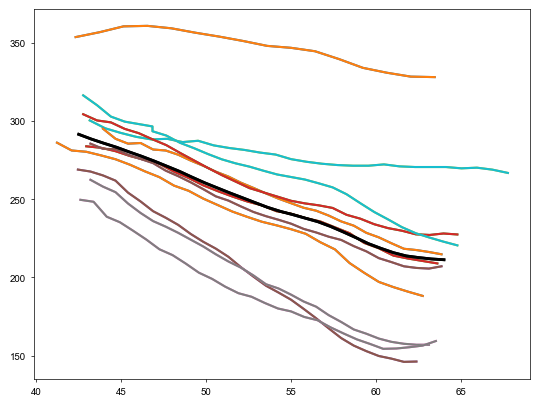

In [47]:
# export h1 h2

folder = 'furrow_position_carhoa_h1h2'
create_folder(folder)


for i in carhoa_replicates_info.index:
    if_displacement_phase1, if_displacement_phase2, cp_displacement_phase2, time_phase1, time_phase2 = carhoa_info[i]['data'][:5]
    r_0 = carhoa_info[i]['data'][11]

    time_phase12 = time_phase1
    h_1 = if_displacement_phase1 + r_0
    h_2 = h_1
    np.save(folder + "\\" + carhoa_info[i]['name'] + "_time_h1_h2.npy", [time_phase12, h_1, h_2])

    plt.plot(time_phase12, h_1)
    plt.plot(time_phase12, h_2)

time_phase12 = time_phase1_interp_carhoa
h_1 = if_cp_averaged_carhoa_w_r0[0]
h_2 = h_1
np.save(folder + "\\carhoa_avg_time_h1_h2.npy", [time_phase12, h_1, h_2])

plt.plot(time_phase12, h_1, color='black', lw=2)
plt.plot(time_phase12, h_2, color='black', lw=2)

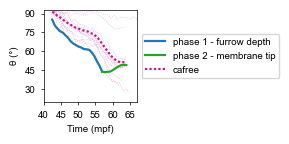

In [48]:
fig, ax = plt.subplots(figsize=[1.2, 1.2])

# plot each individual replicate
for i in wt_replicates_info.index:
    # print('rep', replicates_info.rep[i])

    if_displacement_phase1, if_displacement_phase2, cp_displacement_phase2, time_phase1, time_phase2 = wt_info[i]['data'][:5]
    angle_phase1, angle_phase2 = wt_info[i]['data'][9:11]
    # print(time_phase1[0], time_phase2[-1])
    
    lw, alpha = .8,  0.2
    # ax.plot(time_phase1, if_displacement_phase1, color='tab:blue', lw=lw, zorder=-2, alpha=alpha)
    # ax.plot(time_phase2, if_displacement_phase2, color='tab:orange', lw=lw, zorder=-1, alpha=alpha)
    # ax.plot(time_phase2, cp_displacement_phase2, color='tab:green', lw=lw, zorder=0, alpha=alpha)

    # ax.plot(time_phase1, angle_phase1/2, color='tab:blue', lw=lw, zorder=-3, alpha=alpha)
    # ax.plot(time_phase2, angle_phase2/2, color='tab:green', lw=lw, zorder=-2, alpha=alpha)


for i in carhoa_replicates_info.index:
    # print('rep', replicates_info.rep[i])

    if_displacement_phase1, if_displacement_phase2, cp_displacement_phase2, time_phase1, time_phase2 = carhoa_info[i]['data'][:5]
    angle_phase1, angle_phase2 = carhoa_info[i]['data'][9:11]
    
    lw, alpha = .8,  0.2
    ax.plot(time_phase1, angle_phase1/2, color='mediumvioletred', lw=lw, zorder=-1, ls=(0,(1,1)), alpha=alpha)

# plot the averaged
lw=1.6
# ax.plot(time_phase1_interp, if_cp_averaged[0], color='tab:blue', lw=lw, zorder=1, label='phase 1 - furrow depth')
# ax.plot(time_phase2_interp, if_cp_averaged[2], color='tab:orange', lw=lw, zorder=1, label='phase 2 - membrane tip')
# ax.plot(time_phase2_interp, if_cp_averaged[4], color='tab:green', lw=lw, zorder=2, label='phase 2 - contact point')
# ax.vlines(x=time_phase2_interp, ymin=if_cp_averaged[2], ymax=if_cp_averaged[4], color='tab:orange', lw=lw*0.3, zorder=1, label='phase 2 - contact point')

ax.plot(time_phase1_interp, if_cp_averaged_wo_r0[6]/2, color='tab:blue', lw=lw, zorder=1, label='phase 1 - furrow depth')
ax.plot(time_phase2_interp, if_cp_averaged_wo_r0[8]/2, color='tab:green', lw=lw, zorder=1, label='phase 2 - membrane tip')
ax.plot(time_phase1_interp_carhoa, if_cp_averaged_carhoa_wo_r0[2]/2, color='mediumvioletred', lw=lw, zorder=1, ls=(0,(1,1)), label='cafree')

# ax.axvline(x = 55, color='r', linestyle='dotted')

# ax.invert_yaxis()
ax.set_ylim(20, 93)
ax.set_yticks(np.arange(30, 91, 15)) 
ax.set_xlim(40, 67)
ax.set_xticks(np.arange(40, 70, 5)) 
ax.set_xlabel('Time (mpf)', fontsize=7)
ax.set_ylabel('θ (°)', fontsize=7)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, fontsize=7)
plt.savefig('furrow_angle_wt_carhoa.svg')
plt.show()

In [49]:
np.save('angle_carhoa.npy', np.array([time_phase1_interp_carhoa, if_cp_averaged_carhoa_wo_r0[2]]))

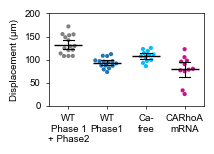

In [50]:
displacements_wt = np.array([np.sum(wt_info[i]['data'][5:7]) for i in wt_replicates_info.index])
displacements_wtphase1 = np.array([wt_info[i]['data'][5] for i in wt_replicates_info.index])
displacements_cafree = np.array([cafree_info[i]['data'][5] for i in cafree_replicates_info.index])
displacements_carhoa = np.array([carhoa_info[i]['data'][5] for i in carhoa_replicates_info.index])


df = {'displacements': np.concatenate([displacements_wt,
                                       displacements_wtphase1,
                                       displacements_cafree,
                                       displacements_carhoa]), 
      'type': np.concatenate([['wt_total'] * len(displacements_wt),
                              ['wt_phase1'] * len(displacements_wtphase1),
                              ['cafree'] * len(displacements_cafree),
                              ['carhoa'] * len(displacements_carhoa)])}
df = pd.DataFrame(df)

fig,ax = plt.subplots(figsize=[2, 1.2])
sns.swarmplot(df, x='type', y= 'displacements',
              ax=ax, hue='type',
              legend=False, palette = ['grey', 'tab:blue', 'deepskyblue' , 'mediumvioletred'],
              size=3, zorder=5)
sns.pointplot(df, x='type', y= 'displacements',
              color='black', ax=ax, zorder=100,
              estimator='mean', errorbar=('ci', 95),
              linestyle='none', marker="_", markersize=20, markeredgewidth=1,
              capsize=0.3, err_kws={'linewidth': 0.8})

ax.set_xticks(range(4))
# ax.set_xlim(-0.5, 2.5)
ax.set_xticklabels(['WT\nPhase 1\n+ Phase2', 'WT\nPhase1', 'Ca-\nfree', 'CARhoA\nmRNA'])
ax.set_ylim(0, 200)
ax.set_yticks(np.arange(0, 201, 50)) 

ax.set_xlabel('', fontsize=7)
ax.set_ylabel('Displacement (\u03bcm)', fontsize=7)
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, fontsize=12)
plt.savefig('wtphase1_cafree_carhoa_displacements.svg')
plt.show()


# statistics
# group1 = displacements_wtphase1
# group2 = displacements_cafreebb
# group3 = displacements_wt
# print(np.mean(group1), np.mean(group2))
# scipy.stats.ttest_ind(group1, group2)


In [51]:
wt_info[0]

{'name': 'Replicate 1',
 'data': [array([  0.   ,  -1.248,  -4.992,  -9.983, -13.311, -17.47 , -23.294,
         -28.285, -34.525, -38.684, -42.844, -49.499, -52.827, -60.314,
         -65.929, -70.921, -75.912, -80.904, -87.143]),
  array([ -87.143,  -90.887, -100.246, -101.494, -106.069, -106.485,
         -110.021, -111.685, -110.021, -113.556]),
  array([-87.143, -83.608, -86.207, -86.831, -87.143, -85.479, -82.984,
         -81.112, -75.496, -70.921]),
  array([41.66666667, 42.5       , 43.33333333, 44.16666667, 45.        ,
         45.83333333, 46.66666667, 47.5       , 48.33333333, 49.16666667,
         50.        , 50.83333333, 51.66666667, 52.5       , 53.33333333,
         54.16666667, 55.        , 55.83333333, 56.66666667]),
  array([56.66666667, 57.5       , 58.33333333, 59.16666667, 60.        ,
         60.83333333, 61.66666667, 62.5       , 63.33333333, 64.16666667]),
  np.float64(87.143),
  np.float64(26.41300000000001),
  np.float64(5.809533333333333),
  np.float64(3.

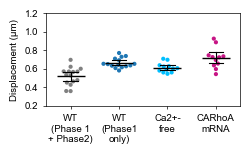

In [98]:
finalh1r0_wt = np.array([wt_info[i]['data'][1][-1]/wt_info[i]['data'][11]+1 for i in wt_replicates_info.index])
finalh1r0_wtphase1 = np.array([wt_info[i]['data'][0][-1]/wt_info[i]['data'][11]+1 for i in wt_replicates_info.index])
finalh1r0_cafree = np.array([cafree_info[i]['data'][0][-1]/cafree_info[i]['data'][11]+1 for i in cafree_replicates_info.index])
finalh1r0_carhoa = np.array([carhoa_info[i]['data'][0][-1]/carhoa_info[i]['data'][11]+1 for i in carhoa_replicates_info.index])

df = {'displacements': np.concatenate([finalh1r0_wt,
                                       finalh1r0_wtphase1,
                                       finalh1r0_cafree,
                                       finalh1r0_carhoa]),
        'type': np.concatenate([['wt_total'] * len(finalh1r0_wt),
                              ['wt_phase1'] * len(finalh1r0_wtphase1),
                              ['cafree'] * len(finalh1r0_cafree),
                              ['carhoa'] * len(finalh1r0_carhoa)]),
        'embryo': np.concatenate([[wt_info[i]['name'] for i in wt_replicates_info.index],
                                  [wt_info[i]['name'] for i in wt_replicates_info.index],
                                  [cafree_info[i]['name'] for i in cafree_replicates_info.index],
                                  [carhoa_info[i]['name'] for i in carhoa_replicates_info.index]])}
df = pd.DataFrame(df)

fig,ax = plt.subplots(figsize=[2.5, 1.2])
sns.swarmplot(df, x='type', y= 'displacements',
              ax=ax, hue='type',
              legend=False, palette = ['grey', 'tab:blue', 'deepskyblue' , 'mediumvioletred'],
              size=3, zorder=5)
sns.pointplot(df, x='type', y= 'displacements',
              color='black', ax=ax, zorder=100,
              estimator='mean', errorbar=('ci', 95),
              linestyle='none', marker="_", markersize=20, markeredgewidth=1,
              capsize=0.3, err_kws={'linewidth': 0.8})

ax.set_xticks(range(4))
# ax.set_xlim(-0.5, 2.5)
ax.set_xticklabels(['WT\n(Phase 1\n+ Phase2)', 'WT\n(Phase1\nonly)', 'Ca2+-\nfree', 'CARhoA\nmRNA'])
ax.set_ylim(0.2, 1.2)
ax.set_yticks(np.arange(0.2, 1.3, 0.2)) 

ax.set_xlabel('', fontsize=7)
ax.set_ylabel('Displacement (\u03bcm)', fontsize=7)
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, fontsize=12)
plt.savefig('wtphase1_cafree_carhoa_h2r0.svg')
plt.show()

In [53]:
# statistics
group1 = df.loc[df['type'] == 'wt_total'].displacements
group2 = df.loc[df['type'] == 'wt_phase1'].displacements
delta_group1group2 = np.array(group1) - np.array(group2)
group3 = df.loc[df['type'] == 'cafree'].displacements
group4 = df.loc[df['type'] == 'carhoa'].displacements

print('--Shapiro-Wilk test for normality--')
for group in [group1, group2, group3, group4]:
    stat_group1, p_group1 = scipy.stats.shapiro(group)
    print("Control: W=%.3f, p=%.3f" % (stat_group1, p_group1))
print(" ")

# Levene’s test (center='median' is more robust to non-normal data)
stat, p_val = scipy.stats.levene(group1, group3, center='mean')
print('--Levene’s test for variance equity--')
print("Levene’s test statistic =", stat)
print("p-value =", p_val)
# Mann–Whitney U test (two-sided)
u_stat, p_val13 = scipy.stats.mannwhitneyu(group1, group3, alternative='two-sided')
print('--Mann-Whitney U test (two-sided)--')
print("Mann–Whitney U statistic =", u_stat)
print("p-value =", p_val13)
print("Statistical test, Mann-Whitney test:", "***p < 0.001." if p_val13<0.001 else f"p = {p_val13:.3f}.")
print(" ")

# Levene’s test (center='median' is more robust to non-normal data)
stat, p_val = scipy.stats.levene(group2, group3, center='mean')
print('--Levene’s test for variance equity--')
print("Levene’s test statistic =", stat)
print("p-value =", p_val)
# Mann–Whitney U test (two-sided)
u_stat, p_val23 = scipy.stats.mannwhitneyu(group2, group3, alternative='two-sided')
print('--Mann-Whitney U test (two-sided)--')
print("Mann–Whitney U statistic =", u_stat)
print("p-value =", p_val23)
print("Statistical test, Mann-Whitney test:", "***p < 0.001." if p_val23<0.001 else f"p = {p_val23:.3f}.")
print(" ")

# Levene’s test (center='median' is more robust to non-normal data)
stat, p_val = scipy.stats.levene(group1, group4, center='mean')
print('--Levene’s test for variance equity--')
print("Levene’s test statistic =", stat)
print("p-value =", p_val)
# Mann–Whitney U test (two-sided)
u_stat, p_val14 = scipy.stats.mannwhitneyu(group1, group4, alternative='two-sided')
print('--Mann-Whitney U test (two-sided)--')
print("Mann–Whitney U statistic =", u_stat)
print("p-value =", p_val14)
print("Statistical test, Mann-Whitney test:", "***p < 0.001." if p_val14<0.001 else f"p = {p_val14:.3f}.")
print(" ")

--Shapiro-Wilk test for normality--
Control: W=0.960, p=0.689
Control: W=0.939, p=0.365
Control: W=0.924, p=0.319
Control: W=0.942, p=0.548
 
--Levene’s test for variance equity--
Levene’s test statistic = 4.9861914283515825
p-value = 0.03474014826742584
--Mann-Whitney U test (two-sided)--
Mann–Whitney U statistic = 34.0
p-value = 0.006766500035059635
Statistical test, Mann-Whitney test: p = 0.007.
 
--Levene’s test for variance equity--
Levene’s test statistic = 0.12020615881339947
p-value = 0.7317123889273565
--Mann-Whitney U test (two-sided)--
Mann–Whitney U statistic = 142.0
p-value = 0.011972878389045894
Statistical test, Mann-Whitney test: p = 0.012.
 
--Levene’s test for variance equity--
Levene’s test statistic = 0.029477206015689587
p-value = 0.8651212751459428
--Mann-Whitney U test (two-sided)--
Mann–Whitney U statistic = 13.0
p-value = 0.0003421570184669136
Statistical test, Mann-Whitney test: ***p < 0.001.
 


In [54]:
stat_group1, p_group1 = scipy.stats.shapiro(delta_group1group2)
print("Control: W=%.3f, p=%.3f" % (stat_group1, p_group1))

# If differences normal
stat, p_val12 = scipy.stats.ttest_rel(group1, group2)
print("Paired t-test:", stat, p_val12)

Control: W=0.949, p=0.512
Paired t-test: -7.351236874409642 3.6129955878092995e-06


In [59]:
# Your raw p-values
raw_pvals = np.array([p_val13, p_val23, p_val14, p_val12])
print("Raw:", np.round(raw_pvals,3))

from statsmodels.stats.multitest import multipletests

# Bonferroni
rej_bonf, pvals_bonf, _, _ = multipletests(raw_pvals, alpha=0.05, method='bonferroni')
print("Bonferroni corrected:", np.round(pvals_bonf,3))

# Holm–Bonferroni
rej_holm, pvals_holm, _, _ = multipletests(raw_pvals, alpha=0.05, method='holm')
print("Holm corrected:", np.round(pvals_holm,3))

# Benjamini–Hochberg (FDR)
rej_fdr, pvals_fdr, _, _ = multipletests(raw_pvals, alpha=0.05, method='fdr_bh')
print("Benjamini–Hochberg corrected:", np.round(pvals_fdr,3))

Raw: [0.007 0.012 0.    0.   ]
Bonferroni corrected: [0.027 0.048 0.001 0.   ]
Holm corrected: [0.014 0.014 0.001 0.   ]
Benjamini–Hochberg corrected: [0.009 0.012 0.001 0.   ]


In [94]:
from xint_toolbox import find_closest
#cafree at 57mpf
group5 = [(cafree_info[i]['data'][0][find_closest(array=cafree_info[i]['data'][3], target=57)[1]]/cafree_info[i]['data'][11]+1) for i in cafree_replicates_info.index]
#wt phase 1 only
group6 = np.array([wt_info[i]['data'][0][-1]/wt_info[i]['data'][11]+1 for i in wt_replicates_info.index])


testgroup1, testgroup2 = group5, group6
print('--Shapiro-Wilk test for normality--')
stat, p = scipy.stats.shapiro(testgroup1)
print("Control: W=%.3f, p=%.3f" % (stat, p))
stat, p = scipy.stats.shapiro(testgroup2)
print("Control: W=%.3f, p=%.3f" % (stat, p))
# Levene’s test (center='median' is more robust to non-normal data)
stat, p_val = scipy.stats.levene(testgroup1, testgroup2, center='mean')
print('--Levene’s test for variance equity--')
print("Levene’s test statistic =", stat)
print("p-value =", p_val)
# Mann–Whitney U test (two-sided)
u_stat, p_val = scipy.stats.mannwhitneyu(testgroup1, testgroup2, alternative='two-sided')
print('--Mann-Whitney U test (two-sided)--')
print("Mann–Whitney U statistic =", u_stat)
print("p-value =", p_val)
print("Statistical test, Mann-Whitney test:", "***p < 0.001." if p_val<0.001 else f"p = {p_val:.3f}.")
print(" ")

--Shapiro-Wilk test for normality--
Control: W=0.863, p=0.054
Control: W=0.939, p=0.365
--Levene’s test for variance equity--
Levene’s test statistic = 0.46728116853392
p-value = 0.5005278180638707
--Mann-Whitney U test (two-sided)--
Mann–Whitney U statistic = 89.0
p-value = 0.9805355409897708
Statistical test, Mann-Whitney test: p = 0.981.
 


In [95]:
from xint_toolbox import find_closest
#cafree at 57mpf
group7 = [(carhoa_info[i]['data'][0][find_closest(array=carhoa_info[i]['data'][3], target=57)[1]]/carhoa_info[i]['data'][11]+1) for i in carhoa_replicates_info.index]
#wt phase 1 only
group6 = np.array([wt_info[i]['data'][0][-1]/wt_info[i]['data'][11]+1 for i in wt_replicates_info.index])


testgroup1, testgroup2 = group7, group6
print('--Shapiro-Wilk test for normality--')
stat, p = scipy.stats.shapiro(testgroup1)
print("Control: W=%.3f, p=%.3f" % (stat, p))
stat, p = scipy.stats.shapiro(testgroup2)
print("Control: W=%.3f, p=%.3f" % (stat, p))
# Levene’s test (center='median' is more robust to non-normal data)
stat, p_val = scipy.stats.levene(testgroup1, testgroup2, center='mean')
print('--Levene’s test for variance equity--')
print("Levene’s test statistic =", stat)
print("p-value =", p_val)
# Mann–Whitney U test (two-sided)
u_stat, p_val = scipy.stats.mannwhitneyu(testgroup1, testgroup2, alternative='two-sided')
print('--Mann-Whitney U test (two-sided)--')
print("Mann–Whitney U statistic =", u_stat)
print("p-value =", p_val)
print("Statistical test, Mann-Whitney test:", "***p < 0.001." if p_val<0.001 else f"p = {p_val:.3f}.")
print(" ")

--Shapiro-Wilk test for normality--
Control: W=0.947, p=0.608
Control: W=0.939, p=0.365
--Levene’s test for variance equity--
Levene’s test statistic = 2.7976387076854334
p-value = 0.10739103783019185
--Mann-Whitney U test (two-sided)--
Mann–Whitney U statistic = 143.0
p-value = 0.0018457213176962682
Statistical test, Mann-Whitney test: p = 0.002.
 


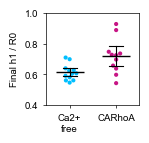

In [ ]:
h1_r0_wt = np.array([wt_info[i]['data'][1][-1]/wt_info[i]['data'][11]+1 for i in wt_replicates_info.index])
h1_r0_wtphase1 = np.array([wt_info[i]['data'][0][-1]/wt_info[i]['data'][11]+1 for i in wt_replicates_info.index])
h1_r0_cafree = np.array([cafree_info[i]['data'][0][-1]/cafree_info[i]['data'][11]+1 for i in cafree_replicates_info.index])
h1_r0_carhoa = np.array([carhoa_info[i]['data'][0][-1]/carhoa_info[i]['data'][11]+1 for i in carhoa_replicates_info.index])

df = {'h_r0': np.concatenate([h1_r0_wt,
                              h1_r0_wtphase1,
                              h1_r0_cafree,
                              h1_r0_carhoa]), 
      'type': np.concatenate([['wt_total'] * len(h1_r0_wt),
                              ['wt_phase1'] * len(h1_r0_wtphase1),
                              ['cafree'] * len(h1_r0_cafree),
                              ['carhoa'] * len(h1_r0_carhoa)])}
df = pd.DataFrame(df)

fig,ax = plt.subplots(figsize=[1.2, 1.2])
sns.swarmplot(df.loc[df['type'].isin(['cafree', 'carhoa'])], x='type', y= 'h_r0',
              ax=ax, hue='type',
              legend=False, palette = ['deepskyblue' , 'mediumvioletred'],
              size=3, zorder=5)
sns.pointplot(df.loc[df['type'].isin(['cafree', 'carhoa'])], x='type', y= 'h_r0',
              color='black', ax=ax, zorder=100,
              estimator='mean', errorbar=('ci', 95),
              linestyle='none', marker="_", markersize=20, markeredgewidth=1,
              capsize=0.3, err_kws={'linewidth': 0.8})

ax.set_xticks(range(2))
# ax.set_xlim(-0.5, 2.5)
ax.set_xticklabels(['Ca2+\nfree', 'CARhoA'])
# ax.set_ylim(-0.1, 1.1)
# ax.set_yticks(np.arange(0, 201, 50)) 
ax.set_ylim(0.4, 1.0)
ax.set_yticks(np.arange(0.4, 1.1, 0.2)) 

ax.set_xlabel('', fontsize=7)
ax.set_ylabel('Final h1 / R0', fontsize=7)
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, fontsize=12)
plt.savefig('cafree_carhoa_final_h1_r0.svg')
plt.show()

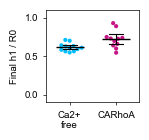

In [ ]:
h1_r0_wt = np.array([wt_info[i]['data'][1][-1]/wt_info[i]['data'][11]+1 for i in wt_replicates_info.index])
h1_r0_wtphase1 = np.array([wt_info[i]['data'][0][-1]/wt_info[i]['data'][11]+1 for i in wt_replicates_info.index])
h1_r0_cafree = np.array([cafree_info[i]['data'][0][-1]/cafree_info[i]['data'][11]+1 for i in cafree_replicates_info.index])
h1_r0_carhoa = np.array([carhoa_info[i]['data'][0][-1]/carhoa_info[i]['data'][11]+1 for i in carhoa_replicates_info.index])

df = {'h_r0': np.concatenate([h1_r0_wt,
                              h1_r0_wtphase1,
                              h1_r0_cafree,
                              h1_r0_carhoa]), 
      'type': np.concatenate([['wt_total'] * len(h1_r0_wt),
                              ['wt_phase1'] * len(h1_r0_wtphase1),
                              ['cafree'] * len(h1_r0_cafree),
                              ['carhoa'] * len(h1_r0_carhoa)])}
df = pd.DataFrame(df)

fig,ax = plt.subplots(figsize=[1.2, 1.2])
sns.swarmplot(df.loc[df['type'].isin(['cafree', 'carhoa'])], x='type', y= 'h_r0',
              ax=ax, hue='type',
              legend=False, palette = ['deepskyblue' , 'mediumvioletred'],
              size=3, zorder=5)
sns.pointplot(df.loc[df['type'].isin(['cafree', 'carhoa'])], x='type', y= 'h_r0',
              color='black', ax=ax, zorder=100,
              estimator='mean', errorbar=('ci', 95),
              linestyle='none', marker="_", markersize=20, markeredgewidth=1,
              capsize=0.3, err_kws={'linewidth': 0.8})

ax.set_xticks(range(2))
# ax.set_xlim(-0.5, 2.5)
ax.set_xticklabels(['Ca2+\nfree', 'CARhoA'])
ax.set_ylim(-0.1, 1.1)
# ax.set_yticks(np.arange(0, 201, 50)) 
# ax.set_ylim(0.4, 1.0)
# ax.set_yticks(np.arange(0.4, 1.1, 0.2)) 

ax.set_xlabel('', fontsize=7)
ax.set_ylabel('Final h1 / R0', fontsize=7)
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, fontsize=12)
plt.savefig('cafree_carhoa_final_h1_r0_2.svg')
plt.show()

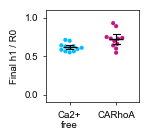

In [ ]:
h1_r0_wt = np.array([wt_info[i]['data'][1][-1]/wt_info[i]['data'][11]+1 for i in wt_replicates_info.index])
h1_r0_wtphase1 = np.array([wt_info[i]['data'][0][-1]/wt_info[i]['data'][11]+1 for i in wt_replicates_info.index])
h1_r0_cafree = np.array([cafree_info[i]['data'][0][-1]/cafree_info[i]['data'][11]+1 for i in cafree_replicates_info.index])
h1_r0_carhoa = np.array([carhoa_info[i]['data'][0][-1]/carhoa_info[i]['data'][11]+1 for i in carhoa_replicates_info.index])

df = {'h_r0': np.concatenate([h1_r0_wt,
                              h1_r0_wtphase1,
                              h1_r0_cafree,
                              h1_r0_carhoa]), 
      'type': np.concatenate([['wt_total'] * len(h1_r0_wt),
                              ['wt_phase1'] * len(h1_r0_wtphase1),
                              ['cafree'] * len(h1_r0_cafree),
                              ['carhoa'] * len(h1_r0_carhoa)])}
df = pd.DataFrame(df)

fig,ax = plt.subplots(figsize=[1.2, 1.2])
sns.swarmplot(df.loc[df['type'].isin(['cafree', 'carhoa'])], x='type', y= 'h_r0',
              ax=ax, hue='type', alpha=1,
              legend=False, palette = ['deepskyblue' , 'mediumvioletred'],
              size=3, zorder=5)
sns.pointplot(df.loc[df['type'].isin(['cafree', 'carhoa'])], x='type', y= 'h_r0',
              color='black', ax=ax, zorder=100,
              estimator='mean', errorbar=('ci', 95),
              linestyle='none', marker="_", markersize=10, markeredgewidth=1,
              capsize=0.15, err_kws={'linewidth': 0.8})

ax.set_xticks(range(2))
# ax.set_xlim(-0.5, 2.5)
ax.set_xticklabels(['Ca2+\nfree', 'CARhoA'])
ax.set_ylim(-0.1, 1.1)
# ax.set_yticks(np.arange(0, 201, 50)) 
# ax.set_ylim(0.4, 1.0)
# ax.set_yticks(np.arange(0.4, 1.1, 0.2)) 

ax.set_xlabel('', fontsize=7)
ax.set_ylabel('Final h1 / R0', fontsize=7)
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, fontsize=12)
plt.savefig('cafree_carhoa_final_h1_r0_4.svg')
plt.show()

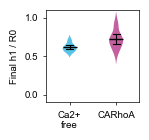

In [ ]:
h1_r0_wt = np.array([wt_info[i]['data'][1][-1]/wt_info[i]['data'][11]+1 for i in wt_replicates_info.index])
h1_r0_wtphase1 = np.array([wt_info[i]['data'][0][-1]/wt_info[i]['data'][11]+1 for i in wt_replicates_info.index])
h1_r0_cafree = np.array([cafree_info[i]['data'][0][-1]/cafree_info[i]['data'][11]+1 for i in cafree_replicates_info.index])
h1_r0_carhoa = np.array([carhoa_info[i]['data'][0][-1]/carhoa_info[i]['data'][11]+1 for i in carhoa_replicates_info.index])

df = {'h_r0': np.concatenate([h1_r0_wt,
                              h1_r0_wtphase1,
                              h1_r0_cafree,
                              h1_r0_carhoa]), 
      'type': np.concatenate([['wt_total'] * len(h1_r0_wt),
                              ['wt_phase1'] * len(h1_r0_wtphase1),
                              ['cafree'] * len(h1_r0_cafree),
                              ['carhoa'] * len(h1_r0_carhoa)])}
df = pd.DataFrame(df)

fig,ax = plt.subplots(figsize=[1.2, 1.2])
sns.violinplot(df.loc[df['type'].isin(['cafree', 'carhoa'])], x='type', y= 'h_r0',
              ax=ax, hue='type', edgecolor='none', alpha=0.75,
              legend=False, palette = ['deepskyblue' , 'mediumvioletred'],
              width=0.3, zorder=5)
sns.pointplot(df.loc[df['type'].isin(['cafree', 'carhoa'])], x='type', y= 'h_r0',
              color='black', ax=ax, zorder=100,
              estimator='mean', errorbar=('ci', 95),
              linestyle='none', marker="_", markersize=10, markeredgewidth=1,
              capsize=0.15, err_kws={'linewidth': 0.8})

ax.set_xticks(range(2))
# ax.set_xlim(-0.5, 2.5)
ax.set_xticklabels(['Ca2+\nfree', 'CARhoA'])
ax.set_ylim(-0.1, 1.1)
# ax.set_yticks(np.arange(0, 201, 50)) 
# ax.set_ylim(0.4, 1.0)
# ax.set_yticks(np.arange(0.4, 1.1, 0.2)) 

ax.set_xlabel('', fontsize=7)
ax.set_ylabel('Final h1 / R0', fontsize=7)
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, fontsize=12)
plt.savefig('cafree_carhoa_final_h1_r0_3.svg')
plt.show()